In [1]:
from utils import get_max_angle
import numpy as np
accel_dist = 0.1
min_pot = 513
max_pot = 635
center_pot = 594

In [8]:
str_ = '''
0.01,0.06,-0.52
0.01,0.10,-0.99
0.02,0.13,-1.47
0.02,0.17,-1.94
0.02,0.20,-2.41
0.03,0.24,-2.89
0.03,0.27,-3.36
0.03,0.32,-3.84
0.03,0.35,-4.30
0.04,0.39,-4.77
0.05,0.42,-5.25
0.05,0.46,-5.72
0.06,0.50,-6.18
0.07,0.53,-6.65
0.07,0.57,-7.12
0.08,0.60,-7.58
0.09,0.65,-8.05
0.10,0.68,-8.52
0.10,0.72,-8.98
0.11,0.75,-9.44
0.12,0.79,-9.91
0.13,0.83,-10.37
0.14,0.86,-10.83
0.15,0.90,-11.29
0.16,0.93,-11.74
0.17,0.97,-12.20
0.18,1.00,-12.66
0.19,1.04,-13.11
0.20,1.07,-13.57
0.21,1.11,-14.02
0.22,1.14,-14.47
0.23,1.17,-14.91
0.24,1.20,-15.37
0.25,1.24,-15.81
0.27,1.27,-16.26
0.28,1.31,-16.70
0.30,1.34,-17.15
0.31,1.37,-17.59
0.32,1.40,-18.03
0.33,1.44,-18.47
0.35,1.47,-18.91
0.36,1.50,-19.34
0.37,1.54,-19.78
0.39,1.57,-20.21
0.40,1.60,-20.64
0.42,1.63,-21.07
0.44,1.67,-21.50
0.45,1.69,-21.92
0.47,1.73,-22.35
0.48,1.76,-22.77
0.50,1.79,-23.20
0.51,1.82,-23.62
0.52,1.85,-24.04
0.55,1.88,-24.45
0.56,1.91,-24.87
0.58,1.94,-25.29
0.59,1.97,-25.69
0.61,2.00,-26.11
0.63,2.03,-26.52
0.65,2.06,-26.92
0.66,2.09,-27.33
0.67,2.11,-27.73
0.70,2.15,-28.13
0.71,2.17,-28.53
0.73,2.20,-28.93
0.75,2.23,-29.32
0.77,2.26,-29.72
0.78,2.29,-30.11
0.81,2.31,-30.50
0.82,2.34,-30.89
0.84,2.36,-31.28
0.86,2.39,-31.66
0.87,2.42,-32.05
0.90,2.44,-32.43
0.91,2.47,-32.81
0.93,2.50,-33.18
0.95,2.52,-33.56
0.97,2.55,-33.93
0.99,2.58,-34.31
1.01,2.60,-34.68
1.03,2.63,-35.05
1.05,2.65,-35.41
1.07,2.67,-35.78
1.09,2.70,-36.14
1.11,2.72,-36.50
1.13,2.74,-36.86
1.15,2.77,-37.22
1.16,2.79,-37.57
1.19,2.81,-37.92
1.21,2.84,-38.27
1.23,2.86,-38.62
1.24,2.88,-38.97
1.27,2.90,-39.31
1.28,2.93,-39.66
1.31,2.95,-40.00
1.32,2.96,-40.34
1.35,2.99,-40.68
1.37,3.01,-41.01
1.39,3.03,-41.35
1.41,3.05,-41.68
1.42,3.07,-42.01
1.45,3.10,-42.34
1.46,3.11,-42.66
1.49,3.13,-42.98
1.51,3.16,-43.31
1.53,3.18,-43.63
1.55,3.20,-43.95
1.57,3.21,-44.26
1.59,3.23,-44.58
1.61,3.25,-44.89
1.63,3.27,-45.20
1.64,3.29,-45.51
1.67,3.30,-45.81
1.68,3.32,-46.12
1.71,3.35,-46.42
1.72,3.36,-46.72
1.75,3.38,-47.02
1.76,3.39,-47.31
1.78,3.41,-47.61
1.80,3.43,-47.90
1.82,3.45,-48.19
1.85,3.47,-48.48
1.86,3.48,-48.77
1.89,3.50,-49.06
1.90,3.51,-49.34
1.92,3.53,-49.62
1.94,3.55,-49.90
1.96,3.57,-50.18
1.98,3.58,-50.45
2.00,3.60,-50.73
2.02,3.61,-51.00
2.04,3.62,-51.27
2.06,3.64,-51.54
2.07,3.65,-51.81
2.09,3.67,-52.07
2.11,3.68,-52.34
2.13,3.69,-52.60
2.15,3.71,-52.86
2.17,3.72,-53.12
2.19,3.73,-53.38
2.20,3.75,-53.63
2.22,3.76,-53.88
2.24,3.78,-54.13
2.26,3.79,-54.38
2.28,3.80,-54.63
2.29,3.81,-54.87
2.31,3.83,-55.12
2.34,3.84,-55.36
2.35,3.85,-55.60
2.37,3.87,-55.83
2.38,3.88,-56.07
2.41,3.89,-56.31
2.43,3.91,-56.54
2.44,3.92,-56.77
2.46,3.93,-57.01
2.47,3.94,-57.23
2.49,3.95,-57.46
2.51,3.96,-57.69
2.53,3.97,-57.91
2.55,3.99,-58.13
2.56,3.99,-58.35
2.58,4.01,-58.58
2.59,4.02,-58.79
2.61,4.03,-59.01
2.62,4.04,-59.22
2.64,4.04,-59.44
2.66,4.06,-59.65
2.67,4.07,-59.86
2.69,4.08,-60.07
2.71,4.09,-60.27
2.72,4.09,-60.48
2.74,4.11,-60.68
2.76,4.12,-60.89
2.77,4.12,-61.09
2.79,4.14,-61.29
2.80,4.14,-61.49
2.82,4.15,-61.68
2.83,4.16,-61.88
2.85,4.17,-62.07
2.86,4.18,-62.26
2.88,4.19,-62.45
2.90,4.20,-62.64
2.91,4.21,-62.83
2.93,4.22,-63.02
2.94,4.23,-63.20
2.96,4.23,-63.39
2.97,4.24,-63.57
2.98,4.25,-63.76
3.00,4.25,-63.93
3.02,4.27,-64.11
3.03,4.28,-64.29
3.05,4.28,-64.46
3.06,4.29,-64.64
3.07,4.30,-64.81
3.09,4.31,-64.98
3.10,4.31,-65.15
3.12,4.32,-65.32
3.13,4.33,-65.49
3.14,4.34,-65.66
3.16,4.34,-65.83
3.17,4.35,-65.99
3.18,4.35,-66.15
3.20,4.36,-66.31
3.21,4.37,-66.47
3.22,4.37,-66.63
3.23,4.38,-66.78
3.25,4.39,-66.95
3.26,4.40,-67.10
3.28,4.40,-67.26
3.28,4.41,-67.41
3.30,4.41,-67.56
3.31,4.42,-67.71
3.33,4.43,-67.86
3.34,4.44,-68.00
3.35,4.44,-68.15
3.36,4.45,-68.30
3.38,4.45,-68.44
3.39,4.46,-68.59
3.40,4.47,-68.73
3.41,4.47,-68.87
3.43,4.48,-69.01
3.43,4.48,-69.15
3.45,4.49,-69.29
3.46,4.49,-69.43
3.47,4.50,-69.57
3.48,4.50,-69.71
3.49,4.51,-69.84
3.50,4.51,-69.97
3.51,4.52,-70.10
3.52,4.52,-70.23
3.53,4.53,-70.36
3.55,4.53,-70.49
3.56,4.54,-70.62
3.57,4.54,-70.74
3.58,4.55,-70.87
3.59,4.55,-71.00
3.60,4.56,-71.12
3.61,4.56,-71.24
3.62,4.56,-71.36
3.63,4.57,-71.48
3.64,4.58,-71.60
3.65,4.58,-71.72
3.66,4.59,-71.84
3.67,4.59,-71.96
3.68,4.59,-72.07
3.69,4.60,-72.19
3.70,4.61,-72.30
3.71,4.60,-72.42
3.72,4.61,-72.53
3.73,4.61,-72.64
3.74,4.62,-72.76
3.74,4.62,-72.86
3.76,4.63,-72.98
3.76,4.63,-73.08
3.78,4.64,-73.19
3.78,4.64,-73.30
3.79,4.64,-73.40
3.80,4.65,-73.51
3.81,4.65,-73.61
3.82,4.65,-73.72
3.83,4.66,-73.82
3.84,4.66,-73.92
3.85,4.67,-74.02
3.86,4.67,-74.12
3.87,4.68,-74.22
3.87,4.68,-74.32
3.88,4.68,-74.42
3.89,4.69,-74.51
3.90,4.69,-74.61
3.91,4.69,-74.71
3.92,4.70,-74.80
3.92,4.70,-74.89
3.93,4.71,-74.99
3.94,4.70,-75.08
3.95,4.71,-75.18
3.95,4.71,-75.27
3.97,4.72,-75.36
3.97,4.72,-75.44
3.98,4.72,-75.54
3.98,4.72,-75.62
4.00,4.73,-75.71
4.00,4.73,-75.80
4.01,4.74,-75.89
4.02,4.74,-75.97
4.03,4.74,-76.06
4.03,4.74,-76.14
4.04,4.75,-76.23
4.05,4.75,-76.31
4.05,4.75,-76.39
4.06,4.76,-76.47
4.07,4.76,-76.55
4.08,4.76,-76.63
4.08,4.76,-76.71
4.09,4.77,-76.79
4.09,4.77,-76.87
4.10,4.77,-76.95
4.11,4.78,-77.02
4.12,4.78,-77.10
4.12,4.78,-77.18
4.13,4.79,-77.25
4.14,4.79,-77.33
4.15,4.79,-77.40
4.15,4.79,-77.48
4.16,4.80,-77.55
4.16,4.80,-77.62
4.17,4.80,-77.69
4.18,4.81,-77.76
4.18,4.81,-77.83
4.19,4.81,-77.90
4.20,4.81,-77.97
4.21,4.82,-78.05
4.21,4.81,-78.11
4.21,4.82,-78.18
4.22,4.82,-78.25
4.22,4.82,-78.32
4.23,4.82,-78.38
4.23,4.82,-78.45
4.24,4.83,-78.51
4.25,4.83,-78.58
4.25,4.83,-78.65
4.25,4.83,-78.71
4.27,4.84,-78.77
4.27,4.84,-78.84
4.28,4.84,-78.89
4.28,4.84,-78.96
4.29,4.84,-79.02
4.29,4.85,-79.08
4.30,4.85,-79.14
4.30,4.85,-79.20
4.31,4.85,-79.26
4.31,4.86,-79.32
4.32,4.86,-79.37
4.32,4.86,-79.44
4.33,4.86,-79.49
4.34,4.87,-79.55
4.34,4.87,-79.60
4.34,4.87,-79.66
4.35,4.87,-79.71
4.36,4.87,-79.77
4.36,4.88,-79.83
4.37,4.88,-79.88
4.37,4.88,-79.94
4.38,4.88,-79.99
4.38,4.88,-80.04
4.38,4.88,-80.10
4.39,4.88,-80.14
4.39,4.89,-80.20
4.40,4.89,-80.25
4.41,4.90,-80.30
4.41,4.89,-80.35
4.42,4.90,-80.40
4.42,4.90,-80.45
4.42,4.90,-80.50
4.43,4.90,-80.54
4.43,4.90,-80.60
4.43,4.90,-80.65
4.45,4.91,-80.69
4.45,4.91,-80.74
4.45,4.91,-80.79
4.45,4.91,-80.84
4.46,4.92,-80.88
4.46,4.91,-80.93
4.47,4.92,-80.98
4.47,4.92,-81.02
4.48,4.92,-81.06
4.48,4.92,-81.11
4.48,4.92,-81.15
4.49,4.92,-81.19
4.49,4.93,-81.24
4.49,4.93,-81.28
4.50,4.93,-81.32
4.50,4.93,-81.36
4.51,4.93,-81.40
4.51,4.93,-81.45
4.52,4.93,-81.49
4.52,4.93,-81.53
4.52,4.94,-81.57
4.52,4.94,-81.61
4.53,4.94,-81.65
4.53,4.94,-81.69
4.54,4.94,-81.73
4.54,4.94,-81.77
4.55,4.95,-81.81
4.55,4.95,-81.85
4.55,4.94,-81.89
4.55,4.95,-81.92
4.56,4.95,-81.96
4.56,4.95,-82.00
4.56,4.95,-82.04
4.56,4.95,-82.07
4.57,4.95,-82.11
4.57,4.95,-82.14
4.57,4.95,-82.18
4.57,4.95,-82.22
4.58,4.95,-82.25
4.58,4.95,-82.28
4.58,4.95,-82.32
4.59,4.96,-82.35
4.59,4.96,-82.39
4.59,4.96,-82.42
4.60,4.96,-82.45
4.60,4.96,-82.49
4.60,4.96,-82.52
4.60,4.96,-82.55
4.60,4.96,-82.58
4.61,4.96,-82.62
4.61,4.96,-82.65
4.62,4.97,-82.67
4.62,4.97,-82.71
4.62,4.97,-82.74
4.63,4.97,-82.77
4.63,4.97,-82.80
4.63,4.97,-82.84
4.63,4.97,-82.87
4.63,4.97,-82.90
4.64,4.98,-82.93
4.64,4.98,-82.96
4.65,4.98,-82.99
4.65,4.98,-83.02
4.65,4.98,-83.05
4.65,4.98,-83.07
4.66,4.99,-83.10
4.66,4.99,-83.13
4.66,4.98,-83.16
4.66,4.98,-83.18
4.66,4.98,-83.21
4.67,4.99,-83.23
4.67,4.99,-83.26
4.68,4.99,-83.29
4.68,4.99,-83.32
4.68,4.99,-83.34
4.68,4.99,-83.37
4.69,4.99,-83.39
4.69,4.99,-83.42
4.69,5.00,-83.45
4.69,5.00,-83.47
4.70,5.00,-83.50
4.70,5.00,-83.52
4.70,5.00,-83.55
4.70,5.00,-83.57
4.71,5.00,-83.60
4.71,5.00,-83.62
4.71,5.01,-83.64
4.71,5.01,-83.67
4.71,5.00,-83.69
4.72,5.00,-83.71
4.72,5.01,-83.74
4.72,5.00,-83.76
4.72,5.01,-83.78
4.72,5.01,-83.80
4.72,5.00,-83.83
4.72,5.00,-83.85
4.73,5.01,-83.88
4.73,5.01,-83.90
4.74,5.01,-83.92
4.74,5.02,-83.94
4.74,5.02,-83.96
4.75,5.02,-83.98
4.75,5.02,-84.00
4.75,5.01,-84.03
4.75,5.02,-84.05
4.76,5.02,-84.07
4.76,5.02,-84.09
4.76,5.03,-84.11
4.77,5.03,-84.13
4.77,5.03,-84.15
4.77,5.03,-84.17
4.77,5.03,-84.19
4.77,5.03,-84.20
4.77,5.03,-84.22
4.77,5.03,-84.24
4.78,5.03,-84.26
4.78,5.03,-84.28
4.78,5.03,-84.30
4.79,5.04,-84.32
4.79,5.03,-84.34
4.79,5.04,-84.36
4.79,5.03,-84.37
4.79,5.04,-84.39
4.80,5.04,-84.41
4.79,5.04,-84.42
4.79,5.04,-84.44
4.80,5.04,-84.46
4.80,5.04,-84.48
4.80,5.03,-84.49
4.80,5.04,-84.51
4.80,5.04,-84.53
4.81,5.04,-84.55
4.80,5.04,-84.57
4.80,5.04,-84.59
4.81,5.04,-84.60
4.81,5.04,-84.62
4.81,5.04,-84.63
4.81,5.04,-84.65
4.82,5.04,-84.67
4.82,5.04,-84.68
4.82,5.05,-84.69
4.82,5.04,-84.71
4.82,5.05,-84.72
4.82,5.05,-84.74
4.83,5.05,-84.75
4.83,5.05,-84.77
4.83,5.05,-84.78
4.83,5.05,-84.79
4.83,5.05,-84.81
4.83,5.05,-84.82
4.84,5.05,-84.83
4.83,5.05,-84.85
4.84,5.05,-84.86
4.84,5.05,-84.88
4.84,5.06,-84.89
4.84,5.05,-84.91
4.85,5.06,-84.92
4.85,5.06,-84.94
4.85,5.06,-84.95
4.85,5.06,-84.96
4.85,5.06,-84.97
4.85,5.06,-84.99
4.85,5.05,-85.00
4.85,5.06,-85.01
4.85,5.06,-85.03
4.85,5.06,-85.04
4.86,5.06,-85.05
4.85,5.06,-85.06
4.86,5.06,-85.08
4.86,5.06,-85.09
4.86,5.06,-85.10
4.86,5.06,-85.11
4.87,5.06,-85.12
4.86,5.06,-85.13
4.86,5.06,-85.14
4.87,5.06,-85.16
4.87,5.06,-85.17
4.87,5.06,-85.18
4.87,5.06,-85.20
4.87,5.07,-85.21
4.87,5.06,-85.22
4.88,5.07,-85.24
4.87,5.06,-85.25
4.87,5.06,-85.26
4.87,5.06,-85.27
4.87,5.06,-85.28
4.87,5.06,-85.28
4.88,5.06,-85.29
4.88,5.06,-85.30
4.88,5.06,-85.31
4.88,5.07,-85.32
4.89,5.07,-85.34
4.89,5.07,-85.35
4.89,5.07,-85.36
4.89,5.07,-85.38
4.90,5.08,-85.39
4.89,5.07,-85.40
4.90,5.07,-85.41
4.90,5.07,-85.41
4.90,5.07,-85.42
4.90,5.07,-85.43
4.90,5.07,-85.44
4.90,5.07,-85.45
4.90,5.08,-85.46
4.90,5.07,-85.46
4.90,5.08,-85.47
4.90,5.07,-85.48
4.91,5.08,-85.49
4.91,5.08,-85.50
4.91,5.08,-85.51
4.91,5.08,-85.52
4.91,5.08,-85.53
4.91,5.08,-85.54
4.91,5.08,-85.54
4.91,5.07,-85.55
4.91,5.08,-85.56
4.91,5.08,-85.57
4.92,5.08,-85.58
4.92,5.08,-85.59
4.92,5.08,-85.60
4.91,5.08,-85.61
4.92,5.08,-85.62
4.92,5.08,-85.62
4.93,5.09,-85.63
4.92,5.08,-85.64
4.93,5.09,-85.65
4.93,5.09,-85.66
4.93,5.09,-85.67
4.93,5.09,-85.68
4.93,5.09,-85.68
4.93,5.09,-85.68
4.93,5.09,-85.69
4.93,5.08,-85.70
4.93,5.09,-85.71
4.93,5.09,-85.72
4.93,5.09,-85.72
4.93,5.09,-85.73
4.94,5.09,-85.74
4.93,5.09,-85.75
4.94,5.09,-85.75
4.95,5.10,-85.76
4.95,5.10,-85.77
4.95,5.10,-85.77
4.95,5.10,-85.78
4.95,5.10,-85.78
4.95,5.10,-85.79
4.95,5.10,-85.80
4.95,5.10,-85.81
4.95,5.10,-85.82
4.95,5.10,-85.82
4.95,5.10,-85.83
4.95,5.10,-85.83
4.95,5.10,-85.83
4.95,5.10,-85.84
4.96,5.10,-85.84
4.95,5.10,-85.85
4.96,5.10,-85.86
4.96,5.10,-85.86
4.96,5.10,-85.87
4.96,5.10,-85.88
4.96,5.10,-85.88
4.97,5.11,-85.89
4.97,5.11,-85.90
4.97,5.11,-85.90
4.97,5.11,-85.91
4.97,5.11,-85.91
4.97,5.11,-85.92
4.97,5.11,-85.92
4.97,5.11,-85.93
4.97,5.11,-85.94
4.97,5.10,-85.94
4.97,5.10,-85.95
4.97,5.10,-85.95
4.97,5.11,-85.96
4.97,5.11,-85.96
4.97,5.11,-85.97
4.97,5.11,-85.97
4.97,5.11,-85.98
4.98,5.11,-85.99
4.98,5.11,-85.99
4.98,5.11,-86.00
4.98,5.11,-86.00
4.98,5.11,-86.00
4.98,5.11,-86.00
4.98,5.11,-86.01
4.98,5.11,-86.01
4.98,5.11,-86.02
4.98,5.11,-86.03
4.98,5.11,-86.03
4.98,5.11,-86.03
4.99,5.12,-86.04
4.98,5.11,-86.05
4.99,5.11,-86.05
4.99,5.11,-86.06
4.99,5.11,-86.06
4.99,5.11,-86.06
4.99,5.11,-86.06
4.99,5.11,-86.07
4.99,5.12,-86.08
4.99,5.11,-86.08
5.00,5.12,-86.08
4.99,5.11,-86.09
4.99,5.11,-86.10
5.00,5.12,-86.10
5.00,5.12,-86.10
4.99,5.11,-86.11
5.00,5.12,-86.11
4.99,5.11,-86.11
5.00,5.12,-86.12
5.00,5.12,-86.12
5.00,5.12,-86.13
5.00,5.12,-86.13
5.00,5.12,-86.14
5.00,5.12,-86.15
5.00,5.11,-86.15
5.00,5.12,-86.15
5.00,5.11,-86.16
5.00,5.11,-86.16
5.00,5.12,-86.17
5.00,5.12,-86.17
5.00,5.11,-86.17
5.00,5.12,-86.18
5.00,5.11,-86.18
5.00,5.11,-86.18
5.00,5.12,-86.19
5.00,5.11,-86.19
5.00,5.11,-86.20
5.00,5.11,-86.20
5.00,5.11,-86.20
5.00,5.11,-86.21
5.00,5.11,-86.21
5.00,5.11,-86.21
4.99,5.10,-86.22
4.98,5.09,-86.22
4.97,5.08,-86.23
4.96,5.07,-86.23
4.96,5.07,-86.24
4.96,5.07,-86.24
4.95,5.05,-86.24
4.95,5.05,-86.25
4.94,5.04,-86.25
4.94,5.04,-86.26
4.92,5.02,-86.26
4.91,5.01,-86.27
4.89,4.99,-86.28
4.88,4.98,-86.29
4.87,4.97,-86.29
4.86,4.96,-86.30
4.86,4.96,-86.30
4.86,4.96,-86.31
4.85,4.95,-86.31
4.85,4.95,-86.32
4.85,4.94,-86.32
4.84,4.94,-86.33
4.83,4.92,-86.33
4.82,4.91,-86.34
4.82,4.91,-86.35
4.81,4.90,-86.35
4.81,4.90,-86.36
4.81,4.90,-86.36
4.81,4.90,-86.37
4.81,4.90,-86.37
4.81,4.90,-86.37
4.80,4.89,-86.37
4.81,4.90,-86.38
4.81,4.90,-86.38
4.81,4.90,-86.38
4.81,4.90,-86.38
4.81,4.90,-86.39
4.81,4.90,-86.39
4.81,4.90,-86.39
4.81,4.90,-86.39
4.82,4.90,-86.40
4.82,4.90,-86.40
4.82,4.90,-86.40
4.82,4.90,-86.40
4.82,4.90,-86.41
4.82,4.90,-86.41
4.80,4.89,-86.41
4.79,4.87,-86.41
4.77,4.86,-86.41
4.75,4.83,-86.42
4.74,4.82,-86.43
4.72,4.80,-86.44
4.70,4.78,-86.45
4.69,4.76,-86.46
4.68,4.75,-86.45
4.67,4.74,-86.46
4.66,4.73,-86.47
4.64,4.71,-86.47
4.62,4.70,-86.48
4.61,4.68,-86.48
4.59,4.66,-86.48
4.57,4.64,-86.49
4.55,4.62,-86.49
4.53,4.61,-86.50
4.52,4.60,-86.50
4.52,4.59,-86.51
4.53,4.60,-86.50
4.52,4.59,-86.50
4.53,4.60,-86.51
4.52,4.59,-86.51
4.53,4.60,-86.51
4.53,4.60,-86.51
4.52,4.59,-86.52
4.53,4.60,-86.52
4.53,4.60,-86.52
4.53,4.60,-86.52
4.53,4.60,-86.52
4.52,4.59,-86.53
4.53,4.60,-86.53
4.52,4.59,-86.53
4.51,4.58,-86.53
4.50,4.57,-86.54
4.48,4.55,-86.55
4.46,4.53,-86.55
4.44,4.51,-86.55
4.42,4.49,-86.55
4.39,4.45,-86.56
4.35,4.42,-86.56
4.31,4.37,-86.57
4.27,4.33,-86.58
4.22,4.28,-86.59
4.17,4.24,-86.60
4.13,4.19,-86.60
4.07,4.13,-86.61
4.03,4.09,-86.61
3.98,4.04,-86.62
3.93,3.99,-86.62
3.88,3.94,-86.63
3.84,3.90,-86.64
3.79,3.85,-86.64
3.74,3.79,-86.65
3.68,3.74,-86.66
3.63,3.69,-86.67
3.59,3.64,-86.67
3.54,3.60,-86.67
3.50,3.56,-86.67
3.47,3.53,-86.67
3.45,3.51,-86.67
3.44,3.49,-86.67
3.42,3.48,-86.67
3.42,3.47,-86.68
3.41,3.47,-86.68
3.41,3.46,-86.68
3.40,3.46,-86.69
3.39,3.44,-86.69
3.38,3.43,-86.69
3.36,3.41,-86.69
3.35,3.40,-86.70
3.33,3.38,-86.70
3.31,3.36,-86.70
3.30,3.35,-86.71
3.27,3.33,-86.71
3.24,3.30,-86.71
3.21,3.26,-86.72
3.17,3.22,-86.73
3.13,3.18,-86.72
3.08,3.13,-86.73
3.02,3.07,-86.74
2.96,3.01,-86.74
2.90,2.95,-86.74
2.83,2.88,-86.75
2.77,2.81,-86.76
2.70,2.74,-86.76
2.63,2.68,-86.77
2.56,2.61,-86.77
2.50,2.55,-86.77
2.43,2.48,-86.77
2.36,2.41,-86.78
2.29,2.34,-86.78
2.21,2.26,-86.79
2.14,2.19,-86.79
2.06,2.11,-86.80
1.98,2.03,-86.80
1.92,1.96,-86.81
1.85,1.90,-86.81
1.78,1.83,-86.81
1.72,1.77,-86.82
1.65,1.70,-86.82
1.59,1.64,-86.82
1.53,1.58,-86.82
1.47,1.51,-86.83
1.40,1.44,-86.83
1.33,1.38,-86.84
1.26,1.31,-86.84
1.20,1.25,-86.84
1.13,1.18,-86.85
1.07,1.12,-86.85
1.01,1.05,-86.86
0.94,0.98,-86.86
0.87,0.91,-86.86
0.79,0.84,-86.87
0.70,0.75,-86.88
0.61,0.66,-86.88
0.51,0.56,-86.89
0.40,0.44,-86.90
0.28,0.33,-86.91
0.16,0.21,-86.91
0.03,0.07,-86.91
-0.10,-0.06,-86.92
-0.24,-0.19,-86.93
-0.37,-0.32,-86.93
-0.51,-0.46,-86.94
-0.65,-0.60,-86.94
-0.78,-0.73,-86.95
-0.92,-0.88,-86.95
-1.05,-1.00,-86.95
-1.18,-1.13,-86.96
-1.30,-1.25,-86.97
-1.42,-1.37,-86.97
-1.53,-1.48,-86.97
-1.63,-1.58,-86.98
-1.72,-1.67,-86.98
-1.80,-1.75,-86.98
-1.88,-1.82,-86.98
-1.94,-1.89,-86.98
-1.99,-1.94,-86.98
-2.04,-1.99,-86.98
-2.08,-2.03,-86.99
-2.12,-2.07,-86.99
-2.15,-2.10,-86.99
-2.18,-2.13,-86.99
-2.20,-2.15,-86.99
-2.23,-2.18,-86.99
-2.25,-2.20,-86.99
-2.28,-2.23,-86.99
-2.30,-2.25,-87.00
-2.33,-2.29,-87.00
-2.37,-2.32,-87.00
-2.41,-2.36,-87.00
-2.47,-2.42,-87.00
-2.53,-2.48,-87.00
-2.61,-2.56,-87.01
-2.68,-2.63,-87.01
-2.77,-2.72,-87.02
-2.87,-2.82,-87.02
-2.98,-2.93,-87.03
-3.10,-3.05,-87.03
-3.23,-3.18,-87.04
-3.36,-3.31,-87.04
-3.50,-3.45,-87.05
-3.65,-3.60,-87.05
-3.79,-3.74,-87.05
-3.93,-3.88,-87.05
-4.06,-4.01,-87.06
-4.20,-4.14,-87.06
-4.31,-4.26,-87.06
-4.42,-4.37,-87.07
-4.52,-4.47,-87.07
-4.61,-4.56,-87.07
-4.69,-4.63,-87.07
-4.76,-4.71,-87.08
-4.82,-4.77,-87.08
-4.88,-4.82,-87.08
-4.92,-4.86,-87.08
-4.95,-4.90,-87.08
-4.99,-4.94,-87.08
-5.02,-4.97,-87.08
-5.04,-4.99,-87.08
-5.07,-5.02,-87.09
-5.10,-5.05,-87.09
-5.13,-5.08,-87.09
-5.17,-5.12,-87.10
-5.19,-5.14,-87.09
-5.19,-5.13,-87.09
-5.19,-5.13,-87.10
-5.19,-5.13,-87.10
-5.18,-5.13,-87.10
-5.18,-5.13,-87.10
-5.18,-5.13,-87.10
-5.18,-5.13,-87.10
-5.18,-5.13,-87.10
-5.18,-5.13,-87.10
-5.18,-5.13,-87.10
-5.17,-5.12,-87.10
-5.18,-5.13,-87.10
-5.17,-5.12,-87.10
-5.17,-5.12,-87.10
-5.17,-5.12,-87.10
-5.17,-5.12,-87.10
-5.17,-5.12,-87.10
-5.16,-5.11,-87.10
-5.16,-5.11,-87.10
-5.16,-5.11,-87.10
-5.16,-5.11,-87.10
-5.16,-5.11,-87.11
-5.16,-5.11,-87.11
-5.16,-5.11,-87.11
-5.16,-5.11,-87.11
-5.16,-5.11,-87.11
-5.15,-5.10,-87.10
-5.15,-5.10,-87.10
-5.15,-5.10,-87.11
-5.15,-5.10,-87.11
-5.15,-5.10,-87.11
-5.14,-5.09,-87.10
-5.13,-5.08,-87.10
-5.10,-5.05,-87.09
-5.07,-5.01,-87.08
-5.04,-4.98,-87.07
-5.00,-4.95,-87.07
-4.98,-4.92,-87.06
-4.95,-4.90,-87.06
-4.93,-4.87,-87.06
-4.91,-4.85,-87.06
-4.89,-4.83,-87.06
-4.86,-4.81,-87.06
-4.83,-4.78,-87.06
-4.79,-4.74,-87.05
-4.74,-4.69,-87.05
-4.68,-4.63,-87.05
-4.62,-4.56,-87.04
-4.55,-4.49,-87.04
-4.47,-4.41,-87.04
-4.39,-4.33,-87.04
-4.30,-4.25,-87.04
-4.22,-4.17,-87.04
-4.14,-4.08,-87.04
-4.05,-3.99,-87.03
-3.96,-3.90,-87.02
-3.87,-3.81,-87.00
-3.78,-3.72,-86.99
-3.69,-3.63,-86.98
-3.61,-3.55,-86.97
-3.53,-3.47,-86.96
-3.46,-3.40,-86.96
-3.40,-3.34,-86.97
-3.34,-3.29,-86.97
-3.31,-3.25,-86.98
-3.28,-3.22,-86.99
-3.25,-3.20,-86.99
-3.23,-3.18,-86.99
-3.22,-3.16,-86.99
-3.21,-3.15,-86.99
-3.20,-3.14,-86.99
-3.19,-3.13,-86.98
-3.17,-3.11,-86.98
-3.16,-3.10,-86.98
-3.13,-3.07,-86.97
-3.11,-3.05,-86.97
-3.07,-3.01,-86.96
-3.03,-2.97,-86.96
-2.99,-2.93,-86.97
-2.93,-2.88,-86.97
-2.87,-2.82,-86.97
-2.80,-2.75,-86.96
-2.73,-2.67,-86.96
-2.64,-2.58,-86.96
-2.55,-2.49,-86.95
-2.44,-2.39,-86.94
-2.34,-2.28,-86.94
-2.23,-2.17,-86.95
-2.11,-2.06,-86.94
-2.01,-1.95,-86.95
-1.90,-1.85,-86.95
-1.79,-1.74,-86.95
-1.69,-1.64,-86.95
-1.61,-1.56,-86.95
-1.53,-1.48,-86.95
-1.47,-1.41,-86.95
-1.42,-1.36,-86.94
-1.38,-1.32,-86.94
-1.34,-1.28,-86.93
-1.31,-1.26,-86.93
-1.28,-1.23,-86.92
-1.26,-1.21,-86.92
-1.24,-1.18,-86.91
-1.21,-1.16,-86.90
-1.18,-1.13,-86.90
-1.16,-1.11,-86.91
-1.14,-1.09,-86.91
-1.13,-1.08,-86.91
-1.11,-1.06,-86.92
-1.10,-1.05,-86.92
-1.09,-1.04,-86.92
-1.07,-1.02,-86.92
-1.06,-1.01,-86.92
-1.04,-0.99,-86.91
-1.02,-0.96,-86.91
-0.98,-0.93,-86.91
-0.95,-0.89,-86.91
-0.91,-0.85,-86.91
-0.87,-0.82,-86.91
-0.83,-0.78,-86.91
-0.79,-0.74,-86.91
-0.75,-0.70,-86.91
-0.72,-0.67,-86.91
-0.68,-0.63,-86.91
-0.65,-0.60,-86.92
-0.61,-0.56,-86.92
-0.57,-0.53,-86.92
-0.53,-0.49,-86.91
-0.49,-0.45,-86.91
-0.44,-0.40,-86.91
-0.40,-0.35,-86.90
-0.35,-0.30,-86.90
-0.30,-0.25,-86.90
-0.25,-0.20,-86.90
-0.22,-0.17,-86.90
-0.18,-0.14,-86.90
-0.16,-0.12,-86.91
-0.14,-0.10,-86.91
-0.12,-0.07,-86.92
-0.10,-0.06,-86.91
-0.09,-0.04,-86.91
-0.07,-0.03,-86.90
-0.05,-0.01,-86.89
-0.03,0.01,-86.88
-0.01,0.03,-86.88
0.01,0.05,-86.88
0.02,0.07,-86.89
0.04,0.09,-86.89
0.06,0.11,-86.90
0.08,0.13,-86.90
0.10,0.14,-86.90
0.11,0.15,-86.90
0.12,0.16,-86.90
0.13,0.17,-86.90
0.14,0.18,-86.90
0.14,0.18,-86.90
0.15,0.19,-86.90
0.15,0.19,-86.90
0.16,0.20,-86.90
0.18,0.22,-86.90
0.19,0.23,-86.89
0.21,0.25,-86.89
0.23,0.27,-86.90
0.26,0.30,-86.90
0.28,0.32,-86.91
0.30,0.34,-86.92
0.31,0.35,-86.92
0.33,0.37,-86.92
0.35,0.39,-86.92
0.37,0.41,-86.91
0.40,0.44,-86.91
0.44,0.47,-86.90
0.48,0.51,-86.90
0.51,0.55,-86.89
0.55,0.59,-86.89
0.58,0.62,-86.89
0.61,0.65,-86.90
0.63,0.66,-86.90
0.64,0.67,-86.91
0.64,0.67,-86.92
0.64,0.67,-86.92
0.64,0.67,-86.92
0.64,0.67,-86.92
0.63,0.66,-86.92
0.64,0.67,-86.91
0.63,0.66,-86.91
0.63,0.66,-86.92
0.63,0.66,-86.92
0.63,0.66,-86.91
0.63,0.66,-86.91
0.63,0.66,-86.91
0.63,0.66,-86.91
0.63,0.66,-86.92
0.63,0.66,-86.92
0.63,0.66,-86.92
0.64,0.67,-86.92
0.63,0.66,-86.92
0.63,0.66,-86.92
0.63,0.66,-86.92
0.63,0.66,-86.92
0.63,0.66,-86.92
0.63,0.66,-86.92
0.63,0.66,-86.92
0.62,0.65,-86.92
0.61,0.64,-86.92
0.59,0.62,-86.93
0.57,0.60,-86.93
0.55,0.58,-86.93
0.54,0.56,-86.94
0.52,0.54,-86.94
0.51,0.53,-86.94
0.49,0.52,-86.95
0.47,0.50,-86.95
0.46,0.48,-86.95
0.44,0.46,-86.96
0.42,0.44,-86.96
0.40,0.43,-86.97
0.39,0.42,-86.97
0.39,0.41,-86.97
0.39,0.42,-86.97
0.39,0.41,-86.97
0.39,0.41,-86.97
0.39,0.41,-86.97
0.38,0.41,-86.97
0.39,0.41,-86.97
0.38,0.40,-86.97
0.37,0.39,-86.97
0.36,0.38,-86.97
0.34,0.36,-86.98
0.33,0.35,-86.98
0.32,0.34,-86.98
0.31,0.33,-86.98
0.29,0.31,-86.98
0.28,0.30,-86.99
0.27,0.29,-86.99
0.26,0.28,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.24,0.26,-86.99
0.24,0.26,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.24,0.26,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.24,0.26,-86.99
0.24,0.26,-86.99
0.25,0.27,-86.99
0.25,0.27,-86.99
0.24,0.26,-86.99
0.24,0.26,-86.99
0.25,0.26,-86.99
0.24,0.26,-86.99
0.24,0.26,-86.99
0.25,0.26,-86.99
0.25,0.26,-86.99
0.25,0.26,-86.99
0.25,0.26,-86.99
0.24,0.25,-86.99
0.24,0.25,-86.99
0.24,0.25,-86.99
0.23,0.24,-86.99
0.23,0.24,-86.99
0.23,0.24,-86.99
0.23,0.24,-86.99
0.23,0.24,-86.99
0.23,0.24,-86.99
0.23,0.24,-86.99
0.23,0.24,-86.99
0.22,0.23,-86.99
0.21,0.22,-86.99
0.19,0.20,-86.99
0.18,0.19,-86.99
0.17,0.18,-86.99
0.16,0.17,-86.99
0.16,0.17,-86.99
0.16,0.17,-86.99
0.16,0.17,-86.99
0.16,0.17,-86.99
0.16,0.17,-86.99
0.16,0.17,-86.99
0.16,0.17,-86.99
0.15,0.16,-86.99
0.15,0.16,-86.99
0.16,0.17,-86.99
0.16,0.17,-87.00
0.15,0.16,-87.00
0.15,0.16,-87.00
0.16,0.17,-87.00
0.16,0.17,-87.00
0.15,0.16,-87.00
0.16,0.17,-87.00
0.16,0.17,-87.00
0.15,0.16,-87.00
0.15,0.16,-87.00
0.16,0.17,-87.00
0.16,0.17,-87.00
0.15,0.16,-87.00
0.15,0.16,-87.00
0.15,0.16,-87.00
0.15,0.16,-87.00
0.15,0.16,-87.00
0.14,0.15,-87.00
0.13,0.14,-87.00
0.13,0.14,-87.00
0.12,0.13,-87.00
0.11,0.12,-87.00
0.10,0.10,-87.00
0.08,0.09,-87.00
0.07,0.07,-87.01
0.05,0.06,-87.01
0.03,0.04,-87.01
0.01,0.02,-87.01
-0.01,-0.00,-87.01
-0.02,-0.02,-87.01
-0.04,-0.04,-87.01
-0.05,-0.05,-87.01
-0.06,-0.05,-87.01
-0.06,-0.05,-87.01
-0.06,-0.05,-87.01
-0.06,-0.06,-87.01
-0.06,-0.06,-87.01
-0.07,-0.06,-87.02
-0.07,-0.06,-87.01
-0.07,-0.06,-87.02
-0.07,-0.06,-87.02
-0.07,-0.06,-87.02
-0.07,-0.06,-87.02
-0.06,-0.06,-87.02
-0.07,-0.06,-87.02
-0.07,-0.06,-87.02
-0.07,-0.06,-87.02
-0.07,-0.06,-87.02
-0.07,-0.06,-87.01
-0.07,-0.06,-87.01
-0.07,-0.06,-87.01
-0.07,-0.06,-87.01
-0.07,-0.06,-87.01
-0.07,-0.06,-87.01
-0.07,-0.06,-87.01
-0.07,-0.07,-87.01
-0.07,-0.06,-87.01
-0.07,-0.06,-87.01
-0.07,-0.07,-87.01
-0.07,-0.07,-87.01
-0.07,-0.07,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.07,-0.07,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.06,-0.06,-87.02
-0.05,-0.06,-87.02
-0.05,-0.06,-87.02
-0.05,-0.05,-87.02
-0.05,-0.05,-87.03
-0.05,-0.05,-87.02
-0.04,-0.05,-87.02
-0.03,-0.04,-87.02
-0.02,-0.03,-87.02
-0.02,-0.02,-87.02
-0.01,-0.02,-87.02
-0.01,-0.02,-87.02
-0.01,-0.02,-87.02
-0.01,-0.02,-87.02
-0.01,-0.01,-87.02
-0.01,-0.02,-87.02
-0.01,-0.02,-87.02
-0.01,-0.02,-87.02
-0.00,-0.01,-87.02
0.01,0.00,-87.02
0.01,0.01,-87.02
0.01,0.01,-87.02
0.02,0.01,-87.02
0.02,0.01,-87.02
0.02,0.01,-87.02
0.02,0.01,-87.02
0.02,0.01,-87.02
0.02,0.01,-87.02
0.02,0.01,-87.02
0.02,0.02,-87.02
0.03,0.02,-87.02
0.04,0.03,-87.02
0.05,0.05,-87.02
0.07,0.07,-87.02
0.09,0.08,-87.01
0.10,0.10,-87.01
0.12,0.11,-87.00
0.13,0.12,-87.01
0.14,0.13,-87.01
0.13,0.13,-87.01
0.13,0.13,-87.01
0.14,0.13,-87.01
0.14,0.13,-87.01
0.14,0.13,-87.01
0.14,0.14,-87.01
0.14,0.14,-87.01
0.14,0.14,-87.01
0.15,0.14,-87.01
0.15,0.14,-87.01
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.15,0.14,-87.00
0.16,0.15,-87.01
0.16,0.15,-87.00
0.17,0.16,-87.00
0.18,0.17,-87.00
0.19,0.18,-87.00
0.20,0.19,-87.00
0.21,0.20,-87.00
0.22,0.21,-87.00
0.24,0.23,-86.99
0.27,0.26,-87.00
0.29,0.28,-87.00
0.31,0.30,-87.00
0.33,0.32,-87.00
0.33,0.32,-86.99
0.33,0.32,-86.99
0.33,0.32,-86.99
0.33,0.32,-86.99
0.33,0.32,-86.99
0.32,0.31,-86.99
0.33,0.32,-86.99
0.33,0.32,-86.99
0.32,0.31,-86.99
0.32,0.31,-86.99
0.33,0.32,-86.99
0.32,0.31,-87.00
0.32,0.31,-87.00
0.33,0.32,-87.00
0.33,0.32,-87.00
0.32,0.31,-87.00
0.32,0.31,-87.00
0.33,0.31,-87.00
0.33,0.31,-87.00
0.33,0.31,-87.00
0.33,0.31,-87.00
0.33,0.31,-87.00
0.33,0.31,-87.00
0.32,0.31,-87.00
0.33,0.31,-87.00
0.33,0.31,-87.01
0.33,0.32,-87.01
0.33,0.32,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.33,0.32,-87.01
0.33,0.32,-87.01
0.33,0.31,-87.01
0.33,0.32,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.02
0.33,0.31,-87.01
0.32,0.31,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.33,0.32,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.34,0.32,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.33,0.31,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.33,0.31,-87.01
0.33,0.31,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.33,0.31,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.01
0.34,0.32,-87.00
0.34,0.32,-87.00
0.34,0.32,-87.00
0.34,0.32,-87.00
0.34,0.32,-87.00
0.34,0.32,-87.00
0.34,0.32,-87.00
0.34,0.32,-87.00
0.34,0.32,-87.00
0.35,0.33,-87.00
0.34,0.32,-87.00
0.34,0.32,-87.00
0.35,0.33,-87.00
0.35,0.33,-87.00
0.35,0.33,-87.00
0.35,0.33,-87.00
0.36,0.33,-87.00
0.36,0.33,-87.00
0.36,0.33,-87.00
0.36,0.34,-87.00
0.36,0.33,-87.00
0.36,0.34,-87.00
0.37,0.34,-87.00
0.38,0.35,-87.00
0.39,0.36,-87.00
0.40,0.38,-86.99
0.42,0.40,-86.99
0.44,0.41,-86.99
0.45,0.43,-86.98
0.47,0.45,-86.98
0.49,0.47,-86.97
0.52,0.49,-86.96
0.55,0.52,-86.96
0.57,0.55,-86.96
0.59,0.57,-86.97
0.61,0.58,-86.97
0.62,0.59,-86.97
0.62,0.60,-86.97
0.63,0.61,-86.97
0.63,0.61,-86.97
0.65,0.62,-86.97
0.66,0.64,-86.96
0.68,0.66,-86.96
0.71,0.69,-86.95
0.74,0.72,-86.94
0.78,0.75,-86.94
0.82,0.79,-86.94
0.86,0.83,-86.94
0.90,0.87,-86.94
0.94,0.91,-86.94
0.98,0.95,-86.94
1.02,1.00,-86.94
1.07,1.05,-86.93
1.13,1.10,-86.92
1.18,1.15,-86.92
1.23,1.20,-86.91
1.29,1.26,-86.91
1.34,1.32,-86.91
1.39,1.37,-86.91
1.45,1.43,-86.91
1.51,1.48,-86.91
1.57,1.54,-86.90
1.62,1.59,-86.90
1.67,1.64,-86.89
1.71,1.68,-86.88
1.76,1.73,-86.89
1.80,1.77,-86.89
1.83,1.80,-86.89
1.86,1.84,-86.89
1.89,1.87,-86.89
1.93,1.90,-86.89
1.96,1.93,-86.88
1.99,1.96,-86.88
2.02,1.99,-86.88
2.04,2.01,-86.88
2.06,2.03,-86.88
2.07,2.04,-86.89
2.08,2.05,-86.89
2.08,2.05,-86.89
2.10,2.07,-86.89
2.11,2.08,-86.88
2.14,2.11,-86.88
2.18,2.15,-86.87
2.23,2.20,-86.86
2.28,2.25,-86.85
2.35,2.31,-86.85
2.41,2.38,-86.85
2.48,2.44,-86.85
2.53,2.50,-86.85
2.59,2.56,-86.86
2.65,2.62,-86.86
2.71,2.68,-86.86
2.78,2.74,-86.85
2.85,2.81,-86.84
2.92,2.88,-86.84
2.99,2.96,-86.82
3.06,3.02,-86.82
3.13,3.09,-86.82
3.18,3.15,-86.82
3.24,3.20,-86.83
3.28,3.25,-86.83
3.32,3.28,-86.83
3.35,3.31,-86.83
3.38,3.34,-86.83
3.40,3.36,-86.83
3.41,3.37,-86.82
3.43,3.39,-86.82
3.43,3.39,-86.82
3.43,3.39,-86.82
3.44,3.40,-86.82
3.44,3.40,-86.82
3.45,3.41,-86.82
3.45,3.41,-86.82
3.46,3.42,-86.81
3.47,3.43,-86.81
3.48,3.44,-86.81
3.50,3.46,-86.81
3.51,3.47,-86.82
3.53,3.49,-86.82
3.55,3.51,-86.82
3.58,3.54,-86.82
3.60,3.56,-86.81
3.64,3.60,-86.81
3.67,3.63,-86.81
3.72,3.67,-86.80
3.76,3.71,-86.80
3.81,3.76,-86.80
3.86,3.81,-86.80
3.91,3.86,-86.79
3.96,3.91,-86.79
4.01,3.96,-86.79
4.06,4.02,-86.79
4.11,4.06,-86.78
4.15,4.11,-86.78
4.19,4.15,-86.78
4.23,4.18,-86.78
4.25,4.21,-86.79
4.27,4.23,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.29,4.24,-86.79
4.30,4.24,-86.79
4.29,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.78
4.30,4.24,-86.78
4.30,4.24,-86.78
4.30,4.24,-86.78
4.30,4.24,-86.78
4.30,4.24,-86.78
4.30,4.24,-86.78
4.30,4.24,-86.78
4.30,4.24,-86.78
4.29,4.24,-86.78
4.30,4.24,-86.79
4.30,4.24,-86.79
4.29,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.29,4.23,-86.80
4.29,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.29,4.23,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.79
4.30,4.24,-86.80
4.30,4.24,-86.80
4.30,4.24,-86.80
4.31,4.24,-86.79
4.32,4.25,-86.79
4.33,4.26,-86.79
4.35,4.29,-86.79
4.38,4.31,-86.79
4.41,4.34,-86.79
4.45,4.38,-86.79
4.48,4.42,-86.79
4.52,4.45,-86.80
4.57,4.50,-86.79
4.61,4.54,-86.79
4.65,4.59,-86.80
4.71,4.64,-86.80
4.77,4.70,-86.79
4.83,4.76,-86.79
4.89,4.82,-86.78
4.97,4.90,-86.78
5.03,4.96,-86.78
5.10,5.03,-86.77
5.17,5.10,-86.78
5.24,5.16,-86.78
5.30,5.22,-86.78
5.35,5.28,-86.77
5.40,5.33,-86.77
5.46,5.39,-86.77
5.51,5.44,-86.77
5.56,5.49,-86.77
5.60,5.52,-86.76
5.63,5.56,-86.76
5.66,5.59,-86.76
5.69,5.61,-86.76
5.70,5.63,-86.76
5.72,5.64,-86.76
5.72,5.65,-86.76
5.72,5.65,-86.76
5.72,5.64,-86.76
5.72,5.65,-86.75
5.72,5.65,-86.76
5.72,5.65,-86.76
5.73,5.65,-86.76
5.74,5.66,-86.75
5.75,5.67,-86.75
5.78,5.70,-86.74
5.81,5.73,-86.74
5.85,5.77,-86.74
5.89,5.81,-86.74
5.94,5.86,-86.74
5.99,5.91,-86.74
6.04,5.96,-86.74
6.09,6.01,-86.74
6.13,6.05,-86.74
6.18,6.10,-86.74
6.24,6.15,-86.73
6.30,6.21,-86.72
6.37,6.28,-86.72
6.44,6.36,-86.71
6.51,6.43,-86.71
6.59,6.51,-86.71
6.64,6.55,-86.71
6.68,6.60,-86.71
6.71,6.62,-86.71
6.72,6.63,-86.71
6.72,6.64,-86.71
6.72,6.64,-86.71
6.72,6.64,-86.70
6.72,6.64,-86.70
6.73,6.64,-86.70
6.73,6.64,-86.70
6.73,6.64,-86.70
6.73,6.64,-86.70
6.73,6.64,-86.71
6.73,6.64,-86.71
6.73,6.64,-86.71
6.73,6.64,-86.71
6.73,6.64,-86.71
6.73,6.64,-86.71
6.74,6.65,-86.71
6.74,6.65,-86.70
6.74,6.65,-86.70
6.74,6.65,-86.70
6.74,6.65,-86.70
6.74,6.64,-86.70
6.74,6.65,-86.70
6.75,6.65,-86.70
6.75,6.65,-86.70
6.76,6.66,-86.70
6.76,6.67,-86.70
6.76,6.67,-86.70
6.77,6.67,-86.70
6.76,6.67,-86.70
6.77,6.67,-86.70
6.76,6.67,-86.70
6.76,6.67,-86.70
6.76,6.67,-86.70
6.76,6.67,-86.70
6.76,6.67,-86.70
6.76,6.67,-86.70
6.77,6.67,-86.70
6.77,6.67,-86.70
6.77,6.67,-86.70
6.77,6.67,-86.70
6.77,6.67,-86.70
6.77,6.67,-86.69
6.77,6.67,-86.69
6.77,6.67,-86.70
6.77,6.67,-86.70
6.77,6.67,-86.70
6.77,6.67,-86.70
6.77,6.67,-86.69
6.77,6.67,-86.69
6.77,6.67,-86.69
6.78,6.68,-86.69
6.79,6.69,-86.69
6.81,6.71,-86.69
6.84,6.74,-86.68
6.88,6.78,-86.67
6.94,6.83,-86.67
7.00,6.89,-86.66
7.07,6.96,-86.66
7.14,7.04,-86.66
7.21,7.11,-86.65
7.29,7.19,-86.66
7.38,7.27,-86.65
7.47,7.36,-86.65
7.56,7.46,-86.65
7.66,7.55,-86.64
7.77,7.66,-86.64
7.88,7.77,-86.64
7.99,7.88,-86.63
8.09,7.98,-86.62
8.19,8.08,-86.62
8.28,8.16,-86.62
8.35,8.24,-86.62
8.41,8.29,-86.62
8.46,8.34,-86.62
8.50,8.38,-86.61
8.54,8.42,-86.60
8.56,8.45,-86.60
8.57,8.46,-86.60
8.58,8.46,-86.60
8.57,8.46,-86.60
8.58,8.46,-86.60
8.58,8.47,-86.60
8.58,8.46,-86.60
8.58,8.46,-86.60
8.58,8.47,-86.60
8.58,8.47,-86.60
8.59,8.48,-86.60
8.60,8.49,-86.59
8.61,8.50,-86.58
8.64,8.52,-86.58
8.67,8.55,-86.57
8.70,8.58,-86.58
8.73,8.61,-86.57
8.76,8.64,-86.57
8.80,8.68,-86.58
8.83,8.71,-86.58
8.85,8.73,-86.58
8.86,8.74,-86.57
8.87,8.75,-86.57
8.88,8.76,-86.57
8.88,8.76,-86.57
8.89,8.77,-86.57
8.89,8.77,-86.56
8.90,8.78,-86.56
8.90,8.78,-86.56
8.90,8.78,-86.56
8.91,8.78,-86.56
8.91,8.78,-86.56
8.91,8.78,-86.56
8.91,8.78,-86.56
8.91,8.79,-86.56
8.92,8.79,-86.56
8.93,8.80,-86.56
8.95,8.82,-86.55
8.97,8.84,-86.55
9.00,8.87,-86.54
9.03,8.90,-86.54
9.06,8.94,-86.54
9.09,8.96,-86.53
9.10,8.98,-86.53
9.12,8.99,-86.52
9.13,9.01,-86.51
9.15,9.03,-86.51
9.17,9.04,-86.51
9.19,9.07,-86.51
9.22,9.09,-86.51
9.25,9.12,-86.51
9.27,9.15,-86.51
9.29,9.17,-86.51
9.30,9.18,-86.51
9.31,9.18,-86.51
9.31,9.18,-86.51
9.31,9.18,-86.51
9.31,9.18,-86.51
9.31,9.18,-86.51
9.32,9.18,-86.51
9.31,9.18,-86.51
9.31,9.18,-86.50
9.31,9.18,-86.50
9.33,9.19,-86.51
9.33,9.20,-86.50
9.34,9.20,-86.50
9.35,9.22,-86.50
9.35,9.22,-86.50
9.35,9.22,-86.50
9.35,9.22,-86.50
9.35,9.22,-86.50
9.35,9.22,-86.49
9.35,9.22,-86.49
9.36,9.22,-86.49
9.35,9.22,-86.49
9.36,9.22,-86.49
9.36,9.23,-86.49
9.37,9.23,-86.49
9.37,9.23,-86.49
9.37,9.24,-86.49
9.38,9.24,-86.49
9.37,9.24,-86.49
9.38,9.24,-86.49
9.38,9.24,-86.48
9.38,9.24,-86.48
9.38,9.24,-86.48
9.38,9.24,-86.48
9.38,9.24,-86.48
9.38,9.24,-86.49
9.38,9.24,-86.48
9.38,9.25,-86.49
9.39,9.25,-86.48
9.39,9.25,-86.48
9.40,9.25,-86.48
9.39,9.25,-86.48
9.39,9.25,-86.48
9.40,9.26,-86.48
9.41,9.26,-86.48
9.41,9.27,-86.48
9.42,9.28,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.47
9.43,9.28,-86.47
9.43,9.29,-86.47
9.43,9.28,-86.47
9.43,9.28,-86.48
9.43,9.29,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.48
9.43,9.29,-86.48
9.43,9.29,-86.48
9.43,9.29,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.48
9.43,9.28,-86.49
9.43,9.27,-86.49
9.43,9.27,-86.48
9.43,9.27,-86.48
9.43,9.27,-86.48
9.43,9.27,-86.48
9.43,9.27,-86.48
9.43,9.28,-86.48
9.43,9.27,-86.48
9.43,9.28,-86.48
9.43,9.27,-86.48
9.43,9.28,-86.48
9.43,9.27,-86.49
9.44,9.28,-86.49
9.45,9.30,-86.49
9.48,9.33,-86.48
9.52,9.36,-86.46
9.55,9.39,-86.45
9.58,9.42,-86.45
9.60,9.44,-86.44
9.61,9.45,-86.44
9.61,9.46,-86.43
9.61,9.46,-86.43
9.61,9.45,-86.44
9.61,9.45,-86.44
9.61,9.45,-86.44
9.62,9.46,-86.44
9.61,9.45,-86.44
9.62,9.46,-86.44
9.61,9.45,-86.44
9.62,9.46,-86.44
9.62,9.46,-86.44
9.63,9.47,-86.44
9.63,9.47,-86.44
9.64,9.48,-86.44
9.64,9.48,-86.44
9.65,9.49,-86.44
9.65,9.49,-86.44
9.65,9.49,-86.44
9.65,9.49,-86.44
9.65,9.49,-86.44
9.65,9.49,-86.43
9.64,9.48,-86.43
9.65,9.48,-86.43
9.65,9.48,-86.44
9.64,9.47,-86.44
9.63,9.47,-86.44
9.61,9.44,-86.44
9.58,9.41,-86.44
9.55,9.38,-86.45
9.51,9.33,-86.47
9.46,9.28,-86.49
9.41,9.23,-86.50
9.34,9.16,-86.53
9.28,9.10,-86.54
9.22,9.04,-86.57
9.16,8.98,-86.58
9.10,8.92,-86.60
9.06,8.88,-86.60
9.03,8.84,-86.60
9.00,8.82,-86.61
8.99,8.81,-86.60
8.99,8.81,-86.59
8.99,8.80,-86.60
8.99,8.81,-86.60
8.99,8.80,-86.60
8.99,8.81,-86.60
8.99,8.81,-86.60
8.99,8.80,-86.60
8.99,8.81,-86.60
9.00,8.81,-86.60
8.99,8.81,-86.60
8.99,8.81,-86.60
8.99,8.80,-86.60
8.97,8.79,-86.60
8.97,8.78,-86.60
8.96,8.77,-86.61
8.95,8.77,-86.61
8.95,8.76,-86.61
8.95,8.76,-86.61
8.96,8.77,-86.61
8.95,8.76,-86.61
8.96,8.76,-86.61
8.95,8.76,-86.61
8.95,8.76,-86.61
8.96,8.76,-86.61
8.96,8.77,-86.60
8.96,8.77,-86.60
8.97,8.77,-86.60
8.99,8.79,-86.60
9.01,8.82,-86.60
9.05,8.85,-86.61
9.08,8.89,-86.60
9.13,8.94,-86.59
9.21,9.02,-86.58
9.31,9.12,-86.56
9.41,9.23,-86.54
9.53,9.35,-86.51
9.64,9.46,-86.50
9.74,9.55,-86.48
9.82,9.63,-86.47
9.88,9.69,-86.45
9.93,9.74,-86.43
9.97,9.78,-86.42
10.00,9.81,-86.42
10.01,9.82,-86.43
10.01,9.82,-86.43
10.01,9.82,-86.43
10.01,9.82,-86.43
10.01,9.82,-86.43
10.01,9.82,-86.43
10.01,9.82,-86.44
10.01,9.82,-86.43
10.01,9.82,-86.43
10.02,9.83,-86.44
10.01,9.82,-86.44
10.02,9.83,-86.44
10.02,9.83,-86.44
10.03,9.84,-86.44
10.03,9.84,-86.44
10.04,9.85,-86.44
10.05,9.85,-86.43
10.05,9.85,-86.43
10.05,9.86,-86.43
10.05,9.86,-86.43
10.05,9.86,-86.44
10.05,9.86,-86.44
10.05,9.86,-86.44
10.06,9.86,-86.44
10.07,9.87,-86.44
10.08,9.88,-86.43
10.09,9.89,-86.43
10.10,9.90,-86.44
10.10,9.90,-86.44
10.10,9.90,-86.44
10.10,9.90,-86.44
10.10,9.90,-86.44
10.10,9.90,-86.44
10.09,9.89,-86.44
10.08,9.87,-86.44
10.05,9.84,-86.43
10.02,9.81,-86.44
9.98,9.77,-86.45
9.94,9.73,-86.47
9.88,9.67,-86.49
9.80,9.59,-86.51
9.72,9.50,-86.54
9.62,9.40,-86.57
9.51,9.29,-86.60
9.38,9.16,-86.63
9.25,9.04,-86.64
9.12,8.91,-86.64
9.01,8.79,-86.65
8.90,8.69,-86.66
8.82,8.60,-86.66
8.73,8.52,-86.67
8.66,8.44,-86.67
8.58,8.36,-86.68
8.51,8.29,-86.69
8.43,8.21,-86.71
8.36,8.14,-86.70
8.30,8.09,-86.71
8.27,8.05,-86.70
8.26,8.04,-86.70
8.26,8.04,-86.71
8.29,8.07,-86.71
8.32,8.10,-86.70
8.36,8.15,-86.70
8.43,8.21,-86.70
8.49,8.28,-86.70
8.59,8.38,-86.68
8.71,8.49,-86.68
8.84,8.62,-86.66
8.99,8.77,-86.64
9.16,8.94,-86.63
9.34,9.12,-86.60
9.52,9.30,-86.57
9.70,9.48,-86.56
9.86,9.65,-86.55
10.00,9.78,-86.53
10.10,9.89,-86.50
10.19,9.98,-86.47
10.26,10.05,-86.44
10.31,10.09,-86.42
10.35,10.13,-86.41
10.38,10.16,-86.43
10.40,10.18,-86.44
10.41,10.19,-86.44
10.41,10.19,-86.43
10.41,10.19,-86.43
10.41,10.19,-86.44
10.41,10.19,-86.44
10.42,10.19,-86.43
10.42,10.19,-86.44
10.41,10.19,-86.45
10.42,10.19,-86.45
10.41,10.19,-86.45
10.41,10.19,-86.45
10.41,10.18,-86.44
10.40,10.18,-86.44
10.40,10.17,-86.44
10.37,10.14,-86.44
10.34,10.10,-86.45
10.29,10.06,-86.46
10.25,10.01,-86.48
10.19,9.95,-86.50
10.13,9.89,-86.52
10.09,9.85,-86.53
10.04,9.80,-86.55
10.00,9.77,-86.56
9.97,9.74,-86.57
9.95,9.72,-86.57
9.94,9.70,-86.56
9.94,9.71,-86.57
9.95,9.71,-86.57
9.95,9.71,-86.57
9.96,9.72,-86.57
9.97,9.73,-86.57
9.97,9.73,-86.57
9.98,9.73,-86.57
9.98,9.73,-86.57
9.97,9.73,-86.57
9.98,9.73,-86.57
9.98,9.73,-86.56
9.97,9.73,-86.56
9.98,9.73,-86.56
9.98,9.73,-86.56
9.98,9.73,-86.56
9.98,9.73,-86.56
9.98,9.73,-86.57
9.98,9.74,-86.57
9.98,9.74,-86.57
9.99,9.74,-86.57
9.99,9.74,-86.57
9.99,9.74,-86.57
9.99,9.75,-86.57
9.99,9.75,-86.56
10.00,9.75,-86.56
9.99,9.75,-86.56
9.99,9.75,-86.56
9.99,9.74,-86.56
9.99,9.74,-86.56
9.99,9.74,-86.56
9.97,9.72,-86.56
9.97,9.72,-86.57
9.96,9.71,-86.57
9.97,9.72,-86.58
9.97,9.72,-86.57
9.98,9.73,-86.57
9.99,9.74,-86.58
10.01,9.75,-86.57
10.02,9.77,-86.56
10.04,9.79,-86.55
10.06,9.81,-86.54
10.07,9.82,-86.53
10.08,9.83,-86.52
10.09,9.83,-86.52
10.08,9.83,-86.52
10.08,9.83,-86.52
10.07,9.82,-86.52
10.07,9.82,-86.53
10.07,9.82,-86.53
10.08,9.82,-86.53
10.08,9.82,-86.53
10.08,9.82,-86.53
10.08,9.82,-86.53
10.08,9.82,-86.53
10.07,9.82,-86.53
10.08,9.82,-86.53
10.07,9.82,-86.53
10.07,9.82,-86.53
10.08,9.82,-86.53
10.08,9.82,-86.53
10.08,9.82,-86.53
10.08,9.82,-86.53
10.07,9.81,-86.53
10.06,9.80,-86.52
10.04,9.78,-86.52
10.02,9.75,-86.53
10.00,9.73,-86.54
9.97,9.71,-86.55
9.96,9.69,-86.55
9.94,9.68,-86.55
9.94,9.67,-86.55
9.94,9.68,-86.55
9.94,9.68,-86.55
9.94,9.68,-86.55
9.94,9.68,-86.55
9.94,9.68,-86.55
9.94,9.68,-86.55
9.95,9.68,-86.55
9.95,9.68,-86.55
9.96,9.69,-86.55
9.96,9.70,-86.54
9.97,9.70,-86.54
9.97,9.70,-86.54
9.97,9.70,-86.54
9.96,9.70,-86.54
9.97,9.70,-86.54
9.96,9.70,-86.54
9.97,9.70,-86.54
9.97,9.70,-86.54
9.98,9.71,-86.54
9.99,9.72,-86.54
10.01,9.74,-86.53
10.02,9.75,-86.52
10.02,9.76,-86.52
10.04,9.77,-86.51
10.04,9.77,-86.51
10.05,9.78,-86.50
10.05,9.78,-86.50
10.06,9.79,-86.50
10.06,9.79,-86.50
10.07,9.81,-86.50
10.08,9.81,-86.50
10.09,9.82,-86.49
10.10,9.83,-86.48
10.10,9.82,-86.48
10.10,9.83,-86.48
10.10,9.83,-86.48
10.10,9.82,-86.48
10.10,9.82,-86.48
10.10,9.83,-86.48
10.11,9.83,-86.48
10.11,9.83,-86.48
10.12,9.84,-86.47
10.13,9.86,-86.46
10.16,9.88,-86.45
10.18,9.91,-86.45
10.20,9.92,-86.46
10.19,9.92,-86.46
10.18,9.91,-86.46
10.18,9.91,-86.44
10.20,9.92,-86.42
10.20,9.92,-86.42
10.21,9.93,-86.43
10.22,9.94,-86.43
10.23,9.96,-86.43
10.25,9.97,-86.44
10.26,9.99,-86.44
10.27,9.99,-86.43
10.29,10.01,-86.43
10.29,10.01,-86.43
10.31,10.02,-86.43
10.30,10.02,-86.43
10.30,10.02,-86.43
10.30,10.02,-86.43
10.30,10.02,-86.43
10.30,10.02,-86.43
10.30,10.02,-86.43
10.30,10.02,-86.43
10.31,10.03,-86.44
10.32,10.03,-86.44
10.32,10.04,-86.44
10.33,10.04,-86.43
10.34,10.06,-86.42
10.36,10.08,-86.42
10.38,10.09,-86.42
10.40,10.11,-86.41
10.42,10.13,-86.42
10.44,10.15,-86.42
10.47,10.18,-86.42
10.49,10.20,-86.42
10.52,10.23,-86.42
10.55,10.26,-86.42
10.59,10.30,-86.41
10.62,10.33,-86.41
10.67,10.38,-86.41
10.71,10.42,-86.40
10.76,10.47,-86.40
10.82,10.52,-86.39
10.88,10.59,-86.39
10.94,10.65,-86.38
11.01,10.72,-86.38
11.08,10.79,-86.38
11.16,10.87,-86.38
11.24,10.94,-86.37
11.31,11.01,-86.36
11.38,11.08,-86.36
11.46,11.16,-86.36
11.53,11.23,-86.36
11.61,11.31,-86.36
11.70,11.39,-86.36
11.79,11.48,-86.36
11.88,11.57,-86.35
11.99,11.68,-86.34
12.09,11.78,-86.33
12.21,11.90,-86.33
12.33,12.02,-86.33
12.45,12.14,-86.33
12.57,12.25,-86.33
12.68,12.36,-86.33
12.79,12.47,-86.33
12.90,12.58,-86.32
13.00,12.68,-86.31
13.10,12.77,-86.30
13.19,12.87,-86.29
13.28,12.96,-86.29
13.38,13.05,-86.28
13.46,13.14,-86.27
13.54,13.21,-86.27
13.62,13.28,-86.27
13.69,13.35,-86.27
13.75,13.41,-86.26
13.80,13.46,-86.26
13.84,13.51,-86.26
13.87,13.53,-86.26
13.90,13.56,-86.27
13.92,13.58,-86.26
13.94,13.60,-86.27
13.95,13.62,-86.27
13.97,13.63,-86.26
13.99,13.65,-86.26
14.01,13.67,-86.26
14.05,13.70,-86.25
14.08,13.74,-86.25
14.12,13.78,-86.25
14.17,13.82,-86.24
14.21,13.87,-86.24
14.26,13.92,-86.25
14.31,13.96,-86.25
14.36,14.01,-86.25
14.41,14.06,-86.24
14.47,14.12,-86.24
14.52,14.17,-86.24
14.58,14.23,-86.24
14.65,14.30,-86.23
14.72,14.36,-86.23
14.78,14.43,-86.23
14.86,14.50,-86.22
14.93,14.57,-86.21
14.99,14.63,-86.21
15.06,14.70,-86.20
15.12,14.76,-86.21
15.17,14.81,-86.20
15.22,14.86,-86.20
15.27,14.91,-86.19
15.31,14.95,-86.20
15.35,14.99,-86.20
15.40,15.03,-86.19
15.43,15.06,-86.19
15.47,15.11,-86.19
15.51,15.14,-86.19
15.54,15.17,-86.19
15.56,15.19,-86.19
15.58,15.21,-86.19
15.60,15.23,-86.20
15.61,15.24,-86.20
15.63,15.26,-86.19
15.64,15.27,-86.19
15.68,15.30,-86.18
15.71,15.34,-86.17
15.76,15.38,-86.17
15.83,15.45,-86.17
15.91,15.53,-86.16
16.00,15.62,-86.16
16.11,15.73,-86.15
16.23,15.84,-86.14
16.34,15.96,-86.13
16.45,16.07,-86.13
16.56,16.17,-86.12
16.67,16.28,-86.12
16.77,16.38,-86.11
16.87,16.48,-86.11
16.98,16.58,-86.10
17.08,16.69,-86.10
17.18,16.78,-86.09
17.28,16.88,-86.09
17.37,16.97,-86.09
17.46,17.06,-86.08
17.55,17.15,-86.08
17.64,17.24,-86.06
17.74,17.33,-86.06
17.84,17.43,-86.05
17.94,17.54,-86.04
18.05,17.65,-86.04
18.18,17.77,-86.03
18.30,17.89,-86.03
18.45,18.04,-86.01
18.59,18.18,-86.00
18.75,18.34,-85.99
18.91,18.50,-85.98
19.05,18.63,-85.97
18.99,18.57,-85.98
19.02,18.60,-85.97
19.04,18.62,-85.97
19.03,18.61,-85.97
19.03,18.61,-85.97
19.03,18.61,-85.96
19.02,18.60,-85.97
19.03,18.61,-85.97
19.03,18.61,-85.97
19.03,18.60,-85.97
19.03,18.60,-85.97
19.03,18.60,-85.96
19.02,18.60,-85.96
19.02,18.60,-85.96
19.02,18.60,-85.97
19.02,18.59,-85.96
19.02,18.59,-85.97
19.02,18.59,-85.97
19.01,18.58,-85.96
19.01,18.58,-85.97
19.01,18.58,-85.97
19.01,18.58,-85.97
19.01,18.57,-85.98
19.01,18.57,-85.98
19.01,18.57,-85.97
19.00,18.57,-85.98
19.00,18.57,-85.98
19.00,18.57,-85.97
19.00,18.57,-85.97
19.00,18.57,-85.97
19.00,18.56,-85.97
19.00,18.56,-85.98
19.00,18.56,-85.98
18.99,18.55,-85.98
18.99,18.55,-85.97
18.98,18.54,-85.98
18.98,18.54,-85.98
18.97,18.53,-85.98
18.96,18.52,-85.98
18.94,18.50,-85.98
18.92,18.48,-85.98
18.89,18.44,-85.99
18.86,18.41,-86.00
18.82,18.37,-86.01
18.78,18.33,-86.02
18.73,18.28,-86.02
18.68,18.23,-86.03
18.64,18.19,-86.04
18.60,18.15,-86.04
18.57,18.12,-86.04
18.54,18.09,-86.04
18.51,18.06,-86.04
18.49,18.04,-86.04
18.47,18.02,-86.05
18.44,17.99,-86.05
18.41,17.96,-86.05
18.38,17.93,-86.06
18.35,17.90,-86.07
18.33,17.87,-86.07
18.31,17.86,-86.08
18.31,17.85,-86.08
18.31,17.85,-86.08
18.31,17.86,-86.07
18.31,17.85,-86.07
18.31,17.85,-86.07
18.31,17.85,-86.08
18.31,17.85,-86.07
18.31,17.85,-86.07
18.31,17.85,-86.07
18.31,17.85,-86.07
18.31,17.85,-86.07
18.31,17.85,-86.07
18.31,17.85,-86.07
18.31,17.85,-86.07
18.31,17.84,-86.07
18.31,17.84,-86.06
18.31,17.85,-86.06
18.31,17.85,-86.06
18.31,17.85,-86.06
18.32,17.85,-86.06
18.33,17.86,-86.06
18.34,17.87,-86.06
18.35,17.88,-86.06
18.36,17.89,-86.06
18.37,17.90,-86.05
18.39,17.92,-86.06
18.41,17.94,-86.05
18.44,17.97,-86.05
18.48,18.01,-86.05
18.50,18.03,-86.04
18.52,18.05,-86.03
18.55,18.07,-86.02
18.57,18.09,-86.01
18.59,18.12,-86.00
18.61,18.14,-86.00
18.63,18.16,-86.00
18.65,18.17,-85.98
18.66,18.19,-85.97
18.67,18.19,-85.96
18.68,18.20,-85.96
18.68,18.20,-85.96
18.68,18.20,-85.97
18.67,18.19,-85.96
18.66,18.18,-85.96
18.66,18.18,-85.97
18.66,18.17,-85.97
18.65,18.17,-85.97
18.65,18.16,-85.97
18.63,18.15,-85.97
18.62,18.14,-85.98
18.60,18.12,-85.99
18.59,18.10,-85.98
18.57,18.08,-85.99
18.55,18.06,-86.00
18.53,18.04,-86.00
18.51,18.02,-86.00
18.50,18.01,-86.00
18.50,18.01,-86.01
18.49,18.00,-86.00
18.49,18.00,-86.01
18.48,17.99,-86.01
18.47,17.98,-86.01
18.45,17.95,-86.01
18.42,17.93,-86.02
18.39,17.89,-86.02
18.35,17.85,-86.03
18.31,17.81,-86.03
18.27,17.77,-86.04
18.22,17.72,-86.05
18.18,17.68,-86.06
18.13,17.63,-86.06
18.08,17.58,-86.06
18.01,17.51,-86.07
17.94,17.44,-86.08
17.86,17.36,-86.09
17.77,17.27,-86.11
17.67,17.18,-86.12
17.58,17.09,-86.13
17.49,16.99,-86.12
17.40,16.91,-86.13
17.32,16.82,-86.13
17.24,16.74,-86.14
17.16,16.66,-86.14
17.07,16.57,-86.14
16.98,16.48,-86.15
16.88,16.38,-86.16
16.77,16.27,-86.17
16.65,16.15,-86.17
16.53,16.04,-86.19
16.41,15.92,-86.19
16.30,15.81,-86.19
16.19,15.70,-86.20
16.08,15.59,-86.20
15.98,15.49,-86.21
15.87,15.38,-86.22
15.77,15.28,-86.22
15.66,15.17,-86.23
15.54,15.05,-86.24
15.43,14.94,-86.24
15.30,14.81,-86.26
15.18,14.69,-86.27
15.07,14.58,-86.26
14.97,14.48,-86.27
14.88,14.39,-86.27
14.80,14.31,-86.28
14.73,14.24,-86.28
14.65,14.16,-86.28
14.57,14.08,-86.29
14.49,14.01,-86.30
14.41,13.93,-86.30
14.33,13.85,-86.31
14.24,13.76,-86.31
14.15,13.67,-86.32
14.06,13.57,-86.33
13.96,13.48,-86.34
13.85,13.37,-86.34
13.74,13.26,-86.35
13.62,13.13,-86.36
13.48,13.00,-86.37
13.34,12.86,-86.39
13.20,12.72,-86.40
13.06,12.58,-86.40
12.92,12.44,-86.40
12.78,12.31,-86.41
12.66,12.18,-86.43
12.54,12.06,-86.43
12.42,11.94,-86.43
12.31,11.83,-86.44
12.19,11.72,-86.44
12.08,11.61,-86.46
11.97,11.50,-86.47
11.87,11.40,-86.47
11.77,11.30,-86.48
11.69,11.22,-86.48
11.62,11.15,-86.49
11.56,11.09,-86.49
11.52,11.05,-86.48
11.49,11.02,-86.49
11.46,10.99,-86.49
11.45,10.97,-86.49
11.43,10.96,-86.49
11.41,10.94,-86.49
11.40,10.93,-86.49
11.39,10.92,-86.49
11.39,10.92,-86.49
11.39,10.91,-86.49
11.38,10.91,-86.49
11.38,10.90,-86.49
11.37,10.89,-86.49
11.35,10.88,-86.49
11.33,10.86,-86.50
11.30,10.83,-86.50
11.27,10.80,-86.50
11.24,10.76,-86.51
11.20,10.73,-86.51
11.17,10.69,-86.51
11.13,10.66,-86.51
11.10,10.62,-86.52
11.05,10.58,-86.52
11.02,10.55,-86.52
10.99,10.52,-86.52
10.96,10.49,-86.52
10.96,10.48,-86.52
10.95,10.48,-86.53
10.95,10.48,-86.53
10.96,10.48,-86.53
10.96,10.48,-86.53
10.96,10.48,-86.53
10.96,10.48,-86.53
10.96,10.48,-86.53
10.96,10.48,-86.54
10.96,10.48,-86.54
10.96,10.48,-86.54
10.96,10.48,-86.54
10.96,10.48,-86.54
10.96,10.48,-86.54
10.96,10.48,-86.54
10.95,10.47,-86.54
10.95,10.47,-86.54
10.95,10.47,-86.54
10.94,10.46,-86.54
10.93,10.45,-86.54
10.93,10.45,-86.55
10.92,10.44,-86.55
10.91,10.43,-86.55
10.90,10.42,-86.55
10.87,10.39,-86.56
10.85,10.37,-86.56
10.81,10.33,-86.56
10.78,10.30,-86.57
10.74,10.27,-86.57
10.71,10.23,-86.57
10.67,10.19,-86.57
10.63,10.15,-86.58
10.58,10.10,-86.58
10.52,10.04,-86.60
10.44,9.96,-86.60
10.35,9.87,-86.61
10.24,9.76,-86.62
10.12,9.64,-86.63
9.99,9.52,-86.63
9.86,9.39,-86.64
9.73,9.26,-86.64
9.59,9.12,-86.64
9.47,9.00,-86.65
9.35,8.88,-86.66
9.23,8.76,-86.67
9.11,8.64,-86.68
9.00,8.53,-86.68
8.90,8.43,-86.68
8.81,8.34,-86.69
8.73,8.27,-86.69
8.67,8.21,-86.69
8.62,8.15,-86.69
8.57,8.10,-86.69
8.53,8.06,-86.70
8.50,8.03,-86.70
8.47,8.00,-86.70
8.44,7.97,-86.70
8.43,7.96,-86.70
8.41,7.94,-86.70
8.40,7.93,-86.70
8.39,7.92,-86.70
8.37,7.90,-86.71
8.35,7.88,-86.72
8.32,7.85,-86.72
8.27,7.80,-86.72
8.21,7.74,-86.73
8.13,7.67,-86.73
8.04,7.58,-86.73
7.94,7.47,-86.74
7.82,7.36,-86.75
7.70,7.23,-86.75
7.56,7.10,-86.76
7.41,6.95,-86.76
7.26,6.79,-86.77
7.09,6.63,-86.78
6.92,6.46,-86.79
6.74,6.29,-86.79
6.56,6.11,-86.80
6.39,5.93,-86.81
6.22,5.76,-86.81
6.04,5.59,-86.83
5.87,5.42,-86.84
5.70,5.25,-86.84
5.54,5.09,-86.85
5.38,4.93,-86.85
5.23,4.78,-86.86
5.08,4.64,-86.86
4.95,4.50,-86.87
4.82,4.38,-86.87
4.70,4.26,-86.88
4.60,4.16,-86.88
4.50,4.06,-86.88
4.42,3.97,-86.89
4.33,3.89,-86.88
4.26,3.82,-86.89
4.19,3.75,-86.90
4.13,3.69,-86.90
4.07,3.62,-86.90
4.01,3.56,-86.90
3.95,3.50,-86.90
3.89,3.45,-86.91
3.82,3.38,-86.91
3.75,3.31,-86.91
3.68,3.24,-86.91
3.60,3.16,-86.91
3.52,3.08,-86.91
3.43,2.99,-86.92
3.34,2.91,-86.92
3.24,2.80,-86.93
3.13,2.69,-86.93
3.01,2.57,-86.94
2.87,2.44,-86.94
2.72,2.28,-86.95
2.55,2.12,-86.96
2.37,1.94,-86.97
2.19,1.76,-86.97
2.02,1.59,-86.98
1.84,1.41,-86.98
1.67,1.24,-86.98
1.50,1.08,-86.98
1.34,0.91,-86.99
1.18,0.75,-86.99
1.01,0.59,-87.00
0.85,0.42,-87.01
0.68,0.26,-87.02
0.51,0.09,-87.02
0.35,-0.07,-87.02
0.17,-0.24,-87.03
0.01,-0.41,-87.04
-0.16,-0.58,-87.04
-0.33,-0.74,-87.05
-0.49,-0.90,-87.05
-0.65,-1.06,-87.06
-0.79,-1.21,-87.06
-0.94,-1.35,-87.06
-1.09,-1.50,-87.06
-1.26,-1.67,-87.07
-1.47,-1.87,-87.09
-1.72,-2.12,-87.10
-2.01,-2.41,-87.12
-2.34,-2.74,-87.13
-2.70,-3.09,-87.15
-3.07,-3.46,-87.16
-3.45,-3.84,-87.16
-3.82,-4.21,-87.16
-4.17,-4.56,-87.18
-4.50,-4.89,-87.18
-4.81,-5.19,-87.18
-4.83,-5.22,-87.17
-4.83,-5.22,-87.14
-4.85,-5.23,-87.18
-4.84,-5.22,-87.20
-4.87,-5.25,-87.19
-4.85,-5.23,-87.18
-4.84,-5.22,-87.19
-4.84,-5.22,-87.19
-4.85,-5.23,-87.18
-4.84,-5.23,-87.17
-4.82,-5.20,-87.17
-4.81,-5.20,-87.18
-4.82,-5.20,-87.17
-4.82,-5.21,-87.17
-4.83,-5.21,-87.18
-4.83,-5.22,-87.18
-4.83,-5.22,-87.18
-4.82,-5.21,-87.17
-4.83,-5.21,-87.18
-4.83,-5.22,-87.18
-4.83,-5.21,-87.18
-4.82,-5.20,-87.18
-4.82,-5.21,-87.18
-4.82,-5.20,-87.18
-4.82,-5.20,-87.18
-4.82,-5.20,-87.18
-4.81,-5.20,-87.18
-4.81,-5.19,-87.18
-4.81,-5.19,-87.18
-4.80,-5.19,-87.18
-4.80,-5.19,-87.18
-4.80,-5.19,-87.18
-4.80,-5.19,-87.18
-4.80,-5.18,-87.18
-4.80,-5.18,-87.18
-4.79,-5.18,-87.18
-4.78,-5.17,-87.17
-4.76,-5.15,-87.17
-4.75,-5.13,-87.17
-4.72,-5.11,-87.17
-4.70,-5.08,-87.16
-4.68,-5.06,-87.17
-4.66,-5.04,-87.17
-4.63,-5.01,-87.16
-4.59,-4.98,-87.16
-4.55,-4.94,-87.14
-4.49,-4.88,-87.13
-4.42,-4.81,-87.12
-4.33,-4.72,-87.11
-4.24,-4.63,-87.11
-4.12,-4.51,-87.09
-4.00,-4.39,-87.09
-3.86,-4.25,-87.09
-3.72,-4.11,-87.08
-3.57,-3.96,-87.07
-3.41,-3.81,-87.06
-3.25,-3.65,-87.05
-3.09,-3.48,-87.04
-2.91,-3.31,-87.02
-2.73,-3.13,-87.01
-2.55,-2.95,-87.00
-2.36,-2.76,-86.98
-2.17,-2.57,-86.97
-1.99,-2.39,-86.96
-1.81,-2.22,-86.96
-1.65,-2.06,-86.97
-1.51,-1.91,-86.96
-1.36,-1.77,-86.95
-1.21,-1.62,-86.95
-1.06,-1.47,-86.94
-0.91,-1.33,-86.92
-0.76,-1.18,-86.91
-0.61,-1.03,-86.90
-0.45,-0.87,-86.89
-0.29,-0.71,-86.89
-0.13,-0.55,-86.88
0.04,-0.38,-86.87
0.20,-0.22,-86.87
0.38,-0.05,-86.86
0.55,0.13,-86.85
0.74,0.31,-86.84
0.94,0.51,-86.81
1.15,0.72,-86.80
1.37,0.94,-86.78
1.60,1.16,-86.77
1.84,1.40,-86.76
2.08,1.65,-86.75
2.33,1.89,-86.74
2.59,2.14,-86.74
2.84,2.40,-86.73
3.09,2.65,-86.72
3.35,2.90,-86.71
3.60,3.15,-86.71
3.84,3.39,-86.70
4.07,3.62,-86.69
4.29,3.83,-86.68
4.51,4.05,-86.67
4.71,4.25,-86.66
4.89,4.43,-86.65
5.07,4.60,-86.64
5.23,4.76,-86.64
5.38,4.91,-86.64
5.51,5.04,-86.63
5.62,5.16,-86.63
5.73,5.27,-86.63
5.84,5.38,-86.63
5.94,5.47,-86.62
6.04,5.57,-86.62
6.13,5.66,-86.61
6.21,5.74,-86.60
6.30,5.83,-86.60
6.39,5.92,-86.60
6.49,6.01,-86.59
6.59,6.12,-86.60
6.70,6.22,-86.60
6.83,6.35,-86.59
6.96,6.48,-86.58
7.11,6.62,-86.57
7.26,6.78,-86.57
7.43,6.95,-86.55
7.60,7.11,-86.54
7.79,7.30,-86.53
7.99,7.49,-86.52
8.18,7.69,-86.51
8.38,7.89,-86.50
8.57,8.07,-86.50
8.75,8.26,-86.49
8.93,8.43,-86.48
9.10,8.60,-86.47
9.24,8.74,-86.47
9.36,8.86,-86.45
9.45,8.94,-86.43
9.52,9.02,-86.42
9.60,9.09,-86.42
9.66,9.15,-86.43
9.71,9.20,-86.43
9.74,9.24,-86.42
9.78,9.27,-86.42
9.81,9.30,-86.42
9.84,9.33,-86.43
9.87,9.35,-86.42
9.88,9.36,-86.42
9.90,9.38,-86.41
9.92,9.41,-86.42
9.94,9.43,-86.42
9.96,9.44,-86.41
9.97,9.46,-86.41
9.98,9.47,-86.41
9.99,9.47,-86.41
9.99,9.48,-86.41
9.99,9.48,-86.41
10.00,9.48,-86.41
10.00,9.49,-86.41
10.02,9.50,-86.41
10.03,9.52,-86.41
10.05,9.53,-86.40
10.06,9.54,-86.40
10.09,9.56,-86.40
10.11,9.59,-86.40
10.13,9.61,-86.41
10.15,9.63,-86.40
10.17,9.65,-86.40
10.19,9.67,-86.39
10.21,9.69,-86.39
10.22,9.70,-86.39
10.22,9.70,-86.39
10.23,9.70,-86.39
10.23,9.70,-86.39
10.23,9.71,-86.39
10.23,9.71,-86.39
10.23,9.71,-86.39
10.24,9.71,-86.39
10.24,9.72,-86.39
10.25,9.72,-86.39
10.26,9.73,-86.39
10.27,9.74,-86.39
10.28,9.75,-86.38
10.30,9.77,-86.38
10.32,9.79,-86.38
10.35,9.82,-86.38
10.40,9.87,-86.38
10.45,9.92,-86.38
10.52,9.98,-86.38
10.57,10.04,-86.38
10.63,10.10,-86.37
10.70,10.16,-86.37
10.77,10.23,-86.36
10.85,10.31,-86.36
10.93,10.39,-86.36
11.02,10.48,-86.36
11.11,10.56,-86.34
11.20,10.65,-86.32
11.30,10.76,-86.33
11.42,10.87,-86.34
11.53,10.98,-86.33
11.62,11.07,-86.31
11.70,11.15,-86.31
11.78,11.23,-86.30
11.86,11.31,-86.30
11.92,11.37,-86.30
11.93,11.38,-86.30
11.93,11.38,-86.28
11.93,11.38,-86.29
11.93,11.38,-86.29
11.93,11.38,-86.28
11.93,11.37,-86.29
11.93,11.37,-86.29
11.93,11.38,-86.29
11.93,11.37,-86.28
11.93,11.37,-86.29
11.93,11.37,-86.29
11.93,11.37,-86.29
11.93,11.37,-86.29
11.94,11.37,-86.28
11.93,11.37,-86.28
11.94,11.37,-86.28
11.94,11.37,-86.28
11.94,11.38,-86.28
11.94,11.38,-86.28
11.95,11.38,-86.28
11.94,11.38,-86.28
11.94,11.38,-86.28
11.94,11.38,-86.28
11.95,11.38,-86.28
11.94,11.38,-86.28
11.95,11.38,-86.28
11.94,11.38,-86.28
11.95,11.38,-86.28
11.95,11.38,-86.28
11.95,11.39,-86.28
11.95,11.38,-86.28
11.95,11.39,-86.27
11.96,11.39,-86.28
11.96,11.39,-86.28
11.95,11.38,-86.28
11.95,11.38,-86.28
11.94,11.37,-86.28
11.94,11.37,-86.28
11.95,11.38,-86.28
11.95,11.37,-86.28
11.95,11.37,-86.28
11.95,11.38,-86.28
11.95,11.37,-86.28
11.95,11.38,-86.28
11.95,11.38,-86.28
11.95,11.37,-86.28
11.95,11.37,-86.27
11.94,11.36,-86.27
11.94,11.36,-86.27
11.93,11.35,-86.27
11.91,11.33,-86.27
11.88,11.30,-86.28
11.85,11.26,-86.28
11.80,11.21,-86.29
11.75,11.17,-86.31
11.70,11.12,-86.33
11.64,11.06,-86.35
11.58,11.00,-86.37
11.51,10.93,-86.39
11.44,10.85,-86.40
11.36,10.78,-86.41
11.29,10.71,-86.42
11.22,10.64,-86.43
11.16,10.58,-86.44
11.10,10.52,-86.44
11.05,10.47,-86.45
11.00,10.42,-86.45
10.94,10.36,-86.46
10.88,10.30,-86.47
10.82,10.25,-86.46
10.77,10.20,-86.46
10.73,10.16,-86.45
10.71,10.13,-86.44
10.70,10.12,-86.43
10.71,10.13,-86.43
10.71,10.13,-86.43
10.72,10.14,-86.43
10.72,10.14,-86.42
10.72,10.14,-86.42
10.72,10.14,-86.42
10.73,10.15,-86.42
10.74,10.16,-86.42
10.77,10.18,-86.42
10.79,10.21,-86.41
10.82,10.24,-86.39
10.86,10.28,-86.38
10.90,10.31,-86.36
10.93,10.34,-86.35
10.96,10.37,-86.35
10.98,10.39,-86.34
11.00,10.41,-86.33
11.03,10.44,-86.33
11.05,10.46,-86.32
11.08,10.49,-86.31
11.10,10.51,-86.30
11.12,10.53,-86.30
11.13,10.53,-86.30
11.13,10.53,-86.30
11.13,10.53,-86.30
11.13,10.54,-86.30
11.13,10.54,-86.30
11.13,10.54,-86.31
11.13,10.53,-86.31
11.13,10.53,-86.31
11.14,10.54,-86.31
11.14,10.55,-86.31
11.16,10.56,-86.30
11.16,10.57,-86.29
11.17,10.57,-86.28
11.17,10.57,-86.28
11.17,10.57,-86.29
11.17,10.57,-86.29
11.16,10.56,-86.30
11.15,10.55,-86.30
11.15,10.55,-86.31
11.13,10.53,-86.31
11.11,10.51,-86.31
11.09,10.49,-86.32
11.06,10.46,-86.33
11.04,10.43,-86.35
11.01,10.41,-86.36
10.99,10.38,-86.38
10.97,10.36,-86.39
10.95,10.35,-86.40
10.95,10.35,-86.40
10.95,10.35,-86.40
10.95,10.35,-86.40
10.95,10.35,-86.40
10.95,10.34,-86.40
10.94,10.33,-86.40
10.93,10.33,-86.40
10.92,10.32,-86.40
10.91,10.31,-86.41
10.91,10.31,-86.41
10.92,10.31,-86.41
10.91,10.31,-86.41
10.92,10.31,-86.40
10.92,10.31,-86.40
10.92,10.31,-86.40
10.92,10.31,-86.40
10.92,10.31,-86.40
10.92,10.31,-86.40
10.92,10.31,-86.40
10.93,10.32,-86.40
10.92,10.31,-86.40
10.93,10.32,-86.40
10.93,10.32,-86.40
10.93,10.31,-86.40
10.93,10.32,-86.40
10.93,10.32,-86.40
10.93,10.32,-86.40
10.94,10.33,-86.40
10.97,10.36,-86.40
11.00,10.39,-86.39
11.04,10.43,-86.39
11.08,10.47,-86.37
11.13,10.52,-86.34
11.18,10.57,-86.32
11.21,10.60,-86.31
11.23,10.61,-86.29
11.24,10.62,-86.28
11.24,10.62,-86.27
11.24,10.62,-86.27
11.24,10.62,-86.27
11.23,10.61,-86.28
11.23,10.61,-86.28
11.23,10.60,-86.28
11.22,10.60,-86.28
11.22,10.59,-86.29
11.21,10.59,-86.28
11.20,10.58,-86.28
11.21,10.58,-86.29
11.21,10.58,-86.29
11.20,10.58,-86.29
11.20,10.58,-86.29
11.20,10.58,-86.29
11.20,10.57,-86.30
11.20,10.57,-86.29
11.19,10.57,-86.29
11.20,10.57,-86.29
11.20,10.57,-86.29
11.19,10.57,-86.29
11.20,10.57,-86.29
11.19,10.57,-86.29
11.19,10.56,-86.29
11.18,10.54,-86.28
11.18,10.54,-86.28
11.19,10.55,-86.27
11.19,10.56,-86.28
11.21,10.57,-86.30
11.21,10.57,-86.32
11.21,10.57,-86.35
11.20,10.57,-86.37
11.20,10.57,-86.38
11.19,10.56,-86.37
11.20,10.56,-86.36
11.19,10.56,-86.36
11.19,10.55,-86.35
11.19,10.56,-86.36
11.20,10.56,-86.36
11.21,10.57,-86.36
11.22,10.58,-86.36
11.23,10.59,-86.36
11.26,10.62,-86.35
11.28,10.64,-86.35
11.31,10.67,-86.35
11.35,10.71,-86.35
11.39,10.75,-86.34
11.43,10.79,-86.33
11.47,10.83,-86.33
11.51,10.87,-86.32
11.55,10.90,-86.31
11.59,10.95,-86.31
11.63,10.99,-86.30
11.68,11.03,-86.30
11.72,11.08,-86.29
11.78,11.13,-86.28
11.83,11.18,-86.26
11.89,11.24,-86.26
11.95,11.30,-86.25
12.02,11.37,-86.25
12.10,11.45,-86.24
12.18,11.53,-86.24
12.27,11.62,-86.24
12.37,11.71,-86.24
12.48,11.82,-86.23
12.60,11.94,-86.23
12.73,12.07,-86.22
12.87,12.21,-86.21
13.02,12.35,-86.19
13.18,12.50,-86.18
13.34,12.67,-86.18
13.50,12.82,-86.18
13.67,12.99,-86.18
13.83,13.15,-86.18
14.00,13.31,-86.18
14.15,13.46,-86.17
14.29,13.61,-86.16
14.42,13.73,-86.15
14.55,13.85,-86.14
14.66,13.96,-86.13
14.77,14.07,-86.13
14.88,14.18,-86.12
14.98,14.28,-86.11
15.08,14.38,-86.11
15.17,14.47,-86.11
15.25,14.54,-86.11
15.31,14.61,-86.11
15.36,14.66,-86.10
15.40,14.69,-86.10
15.42,14.71,-86.10
15.43,14.72,-86.10
15.44,14.73,-86.10
15.45,14.74,-86.10
15.47,14.76,-86.11
15.48,14.77,-86.11
15.50,14.79,-86.11
15.53,14.81,-86.12
15.56,14.85,-86.12
15.60,14.89,-86.13
15.65,14.93,-86.12
15.70,14.98,-86.12
15.76,15.04,-86.12
15.83,15.11,-86.12
15.90,15.19,-86.11
16.00,15.28,-86.11
16.10,15.37,-86.10
16.22,15.49,-86.10
16.34,15.61,-86.10
16.48,15.75,-86.10
16.61,15.88,-86.10
16.74,16.01,-86.10
16.87,16.13,-86.09
16.99,16.25,-86.08
17.11,16.37,-86.07
17.23,16.49,-86.07
17.34,16.60,-86.06
17.46,16.72,-86.05
17.59,16.84,-86.04
17.72,16.97,-86.04
17.86,17.11,-86.03
18.01,17.26,-86.02
18.18,17.43,-86.01
18.37,17.62,-86.00
18.57,17.81,-85.98
18.79,18.03,-85.96
19.01,18.25,-85.95
19.25,18.48,-85.93
19.36,18.60,-85.94
19.29,18.53,-85.96
19.33,18.56,-85.96
19.34,18.57,-85.94
19.33,18.56,-85.93
19.33,18.57,-85.93
19.34,18.57,-85.91
19.32,18.55,-85.92
19.34,18.56,-85.92
19.33,18.56,-85.92
19.33,18.55,-85.92
19.33,18.56,-85.92
19.33,18.55,-85.92
19.33,18.55,-85.92
19.33,18.55,-85.93
19.32,18.55,-85.93
19.32,18.55,-85.92
19.33,18.55,-85.92
19.33,18.55,-85.92
19.32,18.54,-85.92
19.32,18.54,-85.91
19.32,18.54,-85.92
19.32,18.54,-85.91
19.32,18.54,-85.92
19.32,18.54,-85.92
19.32,18.54,-85.92
19.32,18.54,-85.92
19.32,18.53,-85.92
19.32,18.53,-85.91
19.32,18.53,-85.92
19.32,18.53,-85.92
19.32,18.53,-85.91
19.32,18.52,-85.92
19.32,18.52,-85.92
19.32,18.52,-85.91
19.32,18.52,-85.91
19.32,18.52,-85.91
19.32,18.52,-85.91
19.32,18.52,-85.91
19.32,18.52,-85.91
19.32,18.52,-85.90
19.31,18.52,-85.90
19.31,18.52,-85.91
19.32,18.52,-85.91
19.32,18.52,-85.90
19.31,18.51,-85.90
19.31,18.51,-85.90
19.31,18.51,-85.90
19.31,18.51,-85.90
19.31,18.51,-85.90
19.31,18.51,-85.90
19.31,18.51,-85.90
19.31,18.51,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.50,-85.90
19.31,18.49,-85.90
19.31,18.49,-85.90
19.31,18.49,-85.90
19.31,18.49,-85.90
19.31,18.49,-85.90
19.31,18.49,-85.90
19.30,18.48,-85.90
19.31,18.49,-85.90
19.31,18.48,-85.90
19.30,18.48,-85.90
19.30,18.48,-85.90
19.30,18.48,-85.89
19.30,18.47,-85.90
19.30,18.47,-85.90
19.29,18.47,-85.90
19.29,18.46,-85.90
19.29,18.46,-85.90
19.28,18.45,-85.90
19.28,18.45,-85.90
19.27,18.44,-85.90
19.27,18.44,-85.90
19.27,18.44,-85.90
19.26,18.43,-85.90
19.25,18.42,-85.89
19.23,18.40,-85.90
19.21,18.38,-85.90
19.20,18.36,-85.90
19.18,18.35,-85.90
19.18,18.34,-85.90
19.18,18.34,-85.90
19.18,18.34,-85.90
19.17,18.33,-85.91
19.17,18.33,-85.90
19.16,18.32,-85.90
19.14,18.30,-85.91
19.12,18.28,-85.91
19.11,18.27,-85.91
19.09,18.25,-85.91
19.07,18.23,-85.91
19.06,18.21,-85.91
19.03,18.19,-85.91
19.01,18.17,-85.91
19.00,18.15,-85.91
18.97,18.13,-85.91
18.94,18.09,-85.92
18.91,18.07,-85.93
18.87,18.03,-85.94
18.83,17.98,-85.94
18.78,17.94,-85.94
18.73,17.89,-85.94
18.69,17.84,-85.94
18.63,17.79,-85.95
18.58,17.73,-85.95
18.53,17.68,-85.96
18.48,17.63,-85.97
18.43,17.58,-85.98
18.38,17.54,-85.98
18.34,17.50,-85.98
18.31,17.47,-85.99
18.27,17.43,-85.99
18.24,17.39,-86.00
18.20,17.36,-86.01
18.17,17.33,-86.01
18.14,17.30,-86.01
18.11,17.27,-86.01
18.08,17.24,-86.02
18.06,17.21,-86.02
18.03,17.18,-86.02
17.99,17.14,-86.02
17.95,17.11,-86.03
17.91,17.06,-86.04
17.85,17.00,-86.04
17.79,16.94,-86.04
17.73,16.88,-86.05
17.66,16.81,-86.06
17.58,16.74,-86.07
17.50,16.66,-86.07
17.43,16.59,-86.07
17.36,16.52,-86.08
17.28,16.44,-86.08
17.20,16.36,-86.09
17.13,16.28,-86.09
17.05,16.21,-86.09
16.97,16.13,-86.09
16.89,16.04,-86.10
16.80,15.96,-86.11
16.70,15.86,-86.12
16.60,15.76,-86.13
16.48,15.65,-86.13
16.36,15.53,-86.15
16.24,15.41,-86.15
16.12,15.28,-86.16
15.97,15.14,-86.17
15.83,15.00,-86.18
15.69,14.86,-86.19
15.54,14.71,-86.20
15.39,14.56,-86.21
15.23,14.41,-86.21
15.07,14.25,-86.22
14.92,14.09,-86.24
14.75,13.93,-86.25
14.60,13.78,-86.26
14.45,13.64,-86.27
14.33,13.51,-86.27
14.22,13.40,-86.29
14.12,13.30,-86.29
14.02,13.21,-86.30
13.92,13.11,-86.31
13.83,13.02,-86.31
13.74,12.93,-86.33
13.65,12.84,-86.34
13.57,12.76,-86.35
13.49,12.68,-86.35
13.40,12.60,-86.36
13.33,12.52,-86.36
13.25,12.44,-86.36
13.16,12.35,-86.37
13.06,12.26,-86.38
12.96,12.16,-86.39
12.84,12.04,-86.39
12.72,11.92,-86.41
12.58,11.79,-86.42
12.44,11.64,-86.43
12.29,11.49,-86.44
12.13,11.33,-86.45
11.95,11.17,-86.47
11.79,11.00,-86.49
11.61,10.83,-86.50
11.45,10.66,-86.51
11.28,10.50,-86.53
11.12,10.35,-86.53
10.97,10.20,-86.54
10.83,10.05,-86.55
10.69,9.92,-86.56
10.56,9.79,-86.57
10.44,9.67,-86.58
10.32,9.55,-86.59
10.22,9.45,-86.60
10.12,9.36,-86.61
10.03,9.27,-86.62
9.96,9.20,-86.62
9.89,9.12,-86.62
9.82,9.06,-86.63
9.76,9.00,-86.64
9.71,8.95,-86.64
9.67,8.91,-86.64
9.64,8.88,-86.64
9.63,8.87,-86.64
9.62,8.86,-86.64
9.63,8.87,-86.64
9.63,8.87,-86.65
9.63,8.87,-86.65
9.63,8.87,-86.65
9.63,8.87,-86.66
9.63,8.87,-86.65
9.63,8.87,-86.65
9.64,8.88,-86.65
9.63,8.87,-86.65
9.64,8.88,-86.65
9.65,8.88,-86.65
9.65,8.89,-86.65
9.66,8.89,-86.64
9.67,8.91,-86.64
9.69,8.92,-86.65
9.71,8.95,-86.64
9.74,8.98,-86.64
9.78,9.02,-86.64
9.83,9.07,-86.64
9.89,9.12,-86.63
9.95,9.18,-86.63
10.02,9.25,-86.62
10.08,9.31,-86.62
10.17,9.39,-86.61
10.25,9.48,-86.60
10.33,9.55,-86.59
10.40,9.63,-86.59
10.46,9.68,-86.58
10.51,9.73,-86.57
10.55,9.77,-86.56
10.57,9.79,-86.56
10.59,9.81,-86.55
10.60,9.82,-86.54
10.62,9.84,-86.54
10.63,9.84,-86.54
10.64,9.85,-86.54
10.64,9.86,-86.54
10.66,9.87,-86.54
10.66,9.87,-86.54
10.68,9.90,-86.54
10.71,9.92,-86.54
10.76,9.97,-86.53
10.82,10.03,-86.53
10.90,10.11,-86.51
10.99,10.20,-86.51
11.09,10.29,-86.50
11.19,10.39,-86.49
11.29,10.49,-86.48
11.38,10.58,-86.48
11.47,10.67,-86.47
11.56,10.76,-86.47
11.64,10.84,-86.46
11.71,10.91,-86.45
11.79,10.99,-86.45
11.87,11.07,-86.43
11.95,11.14,-86.42
12.04,11.22,-86.41
12.13,11.31,-86.40
12.23,11.41,-86.39
12.33,11.51,-86.39
12.43,11.61,-86.38
12.54,11.72,-86.38
12.67,11.84,-86.37
12.78,11.96,-86.38
12.91,12.08,-86.37
13.04,12.21,-86.36
13.19,12.35,-86.35
13.34,12.51,-86.33
13.50,12.66,-86.31
13.68,12.83,-86.30
13.85,13.00,-86.28
14.02,13.16,-86.27
14.18,13.33,-86.26
14.34,13.48,-86.26
14.49,13.63,-86.26
14.64,13.78,-86.25
14.78,13.92,-86.24
14.93,14.07,-86.23
15.08,14.21,-86.22
15.23,14.35,-86.20
15.38,14.51,-86.19
15.53,14.66,-86.18
15.68,14.80,-86.17
15.81,14.93,-86.16
15.92,15.04,-86.16
16.02,15.13,-86.16
16.09,15.20,-86.16
16.14,15.25,-86.16
16.19,15.30,-86.15
16.22,15.33,-86.15
16.26,15.37,-86.15
16.29,15.40,-86.15
16.33,15.44,-86.14
16.38,15.49,-86.14
16.44,15.54,-86.13
16.51,15.61,-86.13
16.57,15.67,-86.13
16.66,15.75,-86.12
16.73,15.83,-86.12
16.81,15.90,-86.12
16.88,15.98,-86.12
16.95,16.04,-86.12
17.02,16.11,-86.11
17.09,16.18,-86.10
17.17,16.26,-86.10
17.27,16.35,-86.10
17.37,16.46,-86.09
17.48,16.57,-86.08
17.61,16.69,-86.08
17.75,16.83,-86.07
17.89,16.96,-86.07
18.03,17.10,-86.06
18.18,17.25,-86.06
18.32,17.39,-86.05
18.44,17.51,-86.05
18.57,17.64,-86.05
18.68,17.75,-86.04
18.79,17.85,-86.03
18.88,17.95,-86.03
18.97,18.03,-86.02
19.06,18.12,-86.01
19.14,18.20,-86.01
19.22,18.27,-86.00
19.28,18.34,-86.00
19.34,18.40,-85.99
19.41,18.46,-85.99
19.45,18.50,-85.98
19.48,18.52,-85.98
19.46,18.51,-85.98
19.48,18.52,-85.98
19.48,18.52,-85.98
19.48,18.52,-85.97
19.48,18.52,-85.98
19.48,18.52,-85.98
19.48,18.52,-85.97
19.48,18.52,-85.97
19.48,18.52,-85.97
19.48,18.52,-85.97
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.51,-85.98
19.47,18.50,-85.98
19.47,18.50,-85.99
19.47,18.50,-85.98
19.47,18.50,-85.98
19.47,18.50,-85.98
19.47,18.50,-85.97
19.47,18.50,-85.98
19.46,18.49,-85.98
19.47,18.50,-85.98
19.47,18.50,-85.97
19.47,18.49,-85.97
19.47,18.49,-85.97
19.47,18.50,-85.98
19.47,18.49,-85.97
19.47,18.49,-85.97
19.47,18.49,-85.97
19.47,18.49,-85.97
19.47,18.49,-85.97
19.47,18.49,-85.97
19.47,18.49,-85.97
19.47,18.49,-85.97
19.46,18.48,-85.97
19.47,18.48,-85.97
19.47,18.48,-85.97
19.46,18.48,-85.97
19.46,18.48,-85.97
19.46,18.48,-85.97
19.46,18.47,-85.97
19.46,18.47,-85.97
19.46,18.47,-85.97
19.46,18.47,-85.97
19.46,18.47,-85.97
19.46,18.47,-85.97
19.46,18.47,-85.97
19.46,18.47,-85.97
19.45,18.47,-85.97
19.45,18.46,-85.97
19.45,18.46,-85.96
19.45,18.45,-85.97
19.43,18.44,-85.97
19.40,18.41,-85.98
19.38,18.39,-85.98
19.36,18.37,-85.98
19.33,18.34,-85.98
19.32,18.33,-85.99
19.31,18.32,-85.99
19.30,18.30,-85.99
19.29,18.29,-85.99
19.27,18.28,-85.98
19.26,18.26,-85.98
19.25,18.25,-85.98
19.23,18.23,-85.98
19.21,18.21,-85.99
19.18,18.18,-85.99
19.15,18.15,-86.00
19.13,18.13,-86.00
19.11,18.11,-86.01
19.10,18.10,-86.01
19.10,18.10,-86.01
19.10,18.10,-86.00
19.10,18.10,-86.00
19.10,18.10,-86.00
19.10,18.10,-86.00
19.10,18.09,-85.99
19.09,18.09,-85.99
19.10,18.09,-85.99
19.10,18.10,-85.99
19.10,18.09,-85.99
19.10,18.09,-85.98
19.10,18.09,-85.99
19.10,18.09,-85.99
19.10,18.09,-85.99
19.10,18.09,-85.98
19.10,18.09,-85.98
19.10,18.09,-85.98
19.09,18.08,-85.98
19.10,18.09,-85.98
19.10,18.08,-85.98
19.09,18.08,-85.97
19.09,18.08,-85.98
19.08,18.07,-85.98
19.07,18.06,-85.98
19.06,18.04,-85.98
19.05,18.04,-85.98
19.05,18.03,-85.99
19.05,18.03,-85.99
19.05,18.03,-85.99
19.04,18.02,-85.99
19.04,18.02,-85.97
19.03,18.02,-85.97
19.02,18.00,-85.95
19.01,17.99,-85.94
19.00,17.98,-85.92
18.98,17.96,-85.91
18.96,17.93,-85.90
18.93,17.90,-85.90
18.90,17.87,-85.91
18.87,17.84,-85.91
18.85,17.82,-85.90
18.83,17.79,-85.89
18.79,17.76,-85.88
18.74,17.71,-85.87
18.69,17.65,-85.87
18.62,17.58,-85.86
18.54,17.50,-85.86
18.45,17.41,-85.87
18.36,17.32,-85.88
18.27,17.23,-85.89
18.18,17.14,-85.90
18.09,17.06,-85.91
18.01,16.98,-85.92
17.95,16.92,-85.91
17.88,16.85,-85.91
17.82,16.78,-85.90
17.76,16.72,-85.90
17.71,16.67,-85.90
17.65,16.62,-85.89
17.61,16.57,-85.89
17.57,16.53,-85.90
17.53,16.50,-85.91
17.51,16.47,-85.91
17.50,16.46,-85.91
17.49,16.46,-85.91
17.51,16.47,-85.90
17.52,16.47,-85.89
17.53,16.49,-85.89
17.54,16.50,-85.89
17.55,16.51,-85.89
17.56,16.51,-85.88
17.56,16.51,-85.88
17.56,16.51,-85.88
17.56,16.51,-85.88
17.55,16.50,-85.88
17.55,16.50,-85.88
17.53,16.48,-85.88
17.51,16.46,-85.88
17.49,16.44,-85.89
17.45,16.40,-85.90
17.40,16.35,-85.91
17.35,16.30,-85.92
17.28,16.23,-85.94
17.19,16.15,-85.96
17.09,16.04,-85.98
16.96,15.92,-86.00
16.81,15.78,-86.02
16.64,15.61,-86.04
16.45,15.42,-86.06
16.24,15.21,-86.08
16.01,14.99,-86.10
15.77,14.75,-86.11
15.50,14.49,-86.12
15.23,14.22,-86.13
14.94,13.93,-86.15
14.65,13.65,-86.18
14.35,13.35,-86.20
14.05,13.06,-86.22
13.77,12.78,-86.23
13.50,12.51,-86.24
13.25,12.26,-86.25
13.02,12.04,-86.27
12.83,11.85,-86.28
12.68,11.70,-86.30
12.57,11.59,-86.31
12.52,11.54,-86.32
12.52,11.54,-86.33
12.54,11.57,-86.35
12.58,11.61,-86.35
12.63,11.66,-86.34
12.67,11.70,-86.34
12.71,11.73,-86.33
12.73,11.75,-86.33
12.76,11.78,-86.32
12.77,11.79,-86.30
12.79,11.81,-86.29
12.81,11.83,-86.29
12.82,11.83,-86.28
12.83,11.84,-86.27
12.83,11.85,-86.27
12.84,11.85,-86.27
12.83,11.85,-86.27
12.83,11.84,-86.27
12.83,11.84,-86.27
12.83,11.84,-86.27
12.82,11.83,-86.27
12.82,11.83,-86.28
12.83,11.84,-86.28
12.82,11.83,-86.28
12.82,11.83,-86.28
12.83,11.84,-86.28
12.82,11.83,-86.28
12.83,11.84,-86.28
12.83,11.84,-86.28
12.83,11.83,-86.28
12.83,11.84,-86.28
12.83,11.84,-86.29
12.83,11.84,-86.28
12.83,11.84,-86.28
12.84,11.84,-86.29
12.85,11.86,-86.29
12.86,11.87,-86.29
12.88,11.89,-86.27
12.90,11.91,-86.27
12.93,11.93,-86.26
12.95,11.95,-86.25
12.97,11.97,-86.24
12.99,11.99,-86.24
13.01,12.01,-86.23
13.02,12.02,-86.22
13.03,12.03,-86.22
13.04,12.03,-86.22
13.04,12.03,-86.22
13.04,12.03,-86.21
13.04,12.03,-86.22
13.04,12.03,-86.22
13.04,12.03,-86.22
13.03,12.02,-86.22
13.03,12.03,-86.22
13.04,12.03,-86.22
13.03,12.02,-86.22
13.03,12.02,-86.22
13.04,12.03,-86.22
13.04,12.02,-86.22
13.04,12.03,-86.22
13.04,12.03,-86.22
13.04,12.02,-86.22
13.04,12.03,-86.22
13.04,12.02,-86.22
13.04,12.02,-86.22
13.04,12.03,-86.22
13.04,12.02,-86.22
13.04,12.02,-86.22
13.04,12.03,-86.22
13.04,12.02,-86.23
13.04,12.03,-86.22
13.04,12.03,-86.22
13.04,12.02,-86.22
13.04,12.03,-86.22
13.04,12.03,-86.22
13.04,12.03,-86.22
13.05,12.03,-86.23
13.05,12.03,-86.22
13.05,12.03,-86.22
13.05,12.03,-86.22
13.05,12.03,-86.22
13.05,12.03,-86.22
13.05,12.03,-86.22
13.05,12.03,-86.22
13.05,12.03,-86.22
13.06,12.04,-86.22
13.06,12.04,-86.22
13.06,12.03,-86.22
13.06,12.04,-86.23
13.06,12.04,-86.22
13.06,12.04,-86.22
13.06,12.04,-86.22
13.06,12.03,-86.22
13.06,12.03,-86.22
13.06,12.03,-86.23
13.06,12.04,-86.22
13.06,12.03,-86.22
13.06,12.03,-86.22
13.06,12.03,-86.22
13.06,12.03,-86.22
13.06,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.21
13.07,12.03,-86.21
13.07,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.22
13.07,12.03,-86.21
13.07,12.03,-86.21
13.08,12.04,-86.21
13.08,12.04,-86.21
13.07,12.03,-86.21
13.08,12.04,-86.21
13.08,12.04,-86.21
13.07,12.03,-86.21
13.08,12.04,-86.21
13.07,12.03,-86.22
13.07,12.03,-86.21
13.07,12.03,-86.21
13.08,12.03,-86.21
13.08,12.03,-86.21
13.08,12.03,-86.21
13.08,12.03,-86.21
13.08,12.03,-86.22
13.08,12.03,-86.21
13.08,12.03,-86.21
13.09,12.04,-86.21
13.08,12.03,-86.21
13.08,12.03,-86.22
13.09,12.04,-86.21
13.08,12.03,-86.21
13.08,12.03,-86.21
13.09,12.04,-86.21
13.09,12.04,-86.22
13.09,12.04,-86.22
13.09,12.04,-86.22
13.09,12.04,-86.21
13.09,12.04,-86.21
13.09,12.04,-86.22
13.10,12.04,-86.22
13.10,12.04,-86.22
13.10,12.04,-86.22
13.10,12.04,-86.21
13.10,12.04,-86.22
13.09,12.04,-86.22
13.10,12.04,-86.22
13.10,12.04,-86.22
13.10,12.05,-86.22
13.10,12.04,-86.22
13.10,12.04,-86.21
13.10,12.05,-86.21
13.10,12.04,-86.21
13.10,12.05,-86.22
13.11,12.05,-86.21
13.10,12.04,-86.21
13.10,12.05,-86.21
13.11,12.05,-86.21
13.11,12.05,-86.22
13.11,12.05,-86.22
13.11,12.05,-86.22
13.11,12.05,-86.22
13.11,12.04,-86.21
13.11,12.04,-86.21
13.12,12.05,-86.21
13.11,12.05,-86.22
13.11,12.04,-86.21
13.12,12.05,-86.21
13.12,12.05,-86.21
13.12,12.05,-86.21
13.12,12.05,-86.21
13.12,12.05,-86.21
'''

In [9]:
observations = []
for line in str_.split():
    vals = list(map(float, line.split(',')))
    observations.append(vals)


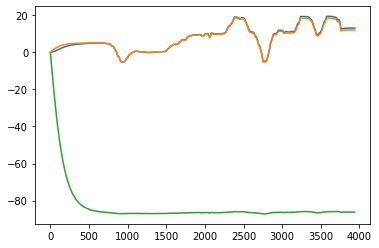

In [10]:
import matplotlib.pyplot as plt
plt.plot([x[0] for x in observations]) # rads/sec^2
plt.plot([x[1] for x in observations]) # rads/sec
plt.plot([x[2] for x in observations]) # potentiometer value

In [67]:
dt = 0.001
input_str = \
'''
20,10,378,
32,-10,378,
-24,8,378,
24,-6,378,
52,14,377,
20,-3,378,
-12,-22,378,
20,-5,378,
32,-19,378,
76,10,379,
-60,-5,378,
48,-1,378,
60,4,378,
44,-9,378,
12,2,377,
-12,-5,379,
-92,10,378,
0,5,377,
44,-7,378,
-24,-4,378,
24,-9,380,
40,20,380,
-116,12,377,
40,8,378,
-92,14,377,
12,-3,378,
-12,5,379,
24,-2,377,
-16,22,378,
-12,13,378,
56,7,378,
-68,-1,378,
-76,-7,378,
44,8,377,
-96,-7,378,
80,2,377,
124,-1,378,
-16,-15,378,
44,3,378,
16,-18,378,
-88,13,378,
-44,14,378,
-92,-7,378,
8,8,378,
-8,-7,378,
8,8,378,
64,12,379,
-16,23,378,
-24,14,378,
-12,-8,379,
12,-2,379,
8,-12,378,
44,20,378,
40,-4,378,
12,-11,378,
12,4,378,
44,-22,378,
48,0,378,
4,-9,378,
16,13,377,
-56,-3,378,
44,-13,378,
-76,-7,378,
8,-2,378,
28,10,378,
16,6,380,
-60,-2,377,
-12,11,378,
4,-10,378,
-24,15,378,
92,6,377,
84,20,378,
-24,8,379,
36,-9,377,
12,8,379,
12,-12,378,
-24,4,378,
84,0,378,
96,2,378,
-88,1,378,
-36,-20,378,
20,9,378,
56,-7,377,
12,5,378,
-64,0,378,
-20,5,380,
-40,5,378,
104,-9,379,
-36,23,378,
64,0,378,
36,4,378,
-24,13,378,
92,-4,378,
-4,10,379,
-84,-2,378,
16,2,378,
-8,2,378,
56,-7,377,
56,3,378,
-24,-12,378,
64,12,378,
16,0,377,
-8,1,378,
8,5,378,
40,-4,380,
44,12,377,
12,-2,378,
12,2,378,
12,4,378,
-8,-7,378,
12,2,378,
-84,5,378,
16,12,378,
-12,-9,378,
48,2,379,
-48,1,378,
104,-6,379,
84,3,378,
8,-10,378,
-72,3,378,
-16,8,377,
44,-3,378,
-48,19,378,
4,-6,378,
20,37,378,
-60,10,378,
-60,-3,378,
-56,6,378,
12,-10,378,
-40,16,377,
-28,28,378,
16,32,378,
12,4,377,
-12,-12,377,
-32,5,378,
-40,-7,379,
108,21,378,
12,-2,378,
60,-20,378,
24,-13,378,
16,-26,378,
-16,5,377,
-68,-2,378,
92,7,378,
-56,-7,378,
108,-18,378,
92,-4,378,
124,-7,380,
-48,28,379,
84,7,379,
-68,1,378,
96,-1,377,
44,-12,379,
-16,25,378,
32,10,377,
40,15,378,
-48,-6,378,
0,-14,377,
44,-1,378,
-32,-7,378,
-8,13,378,
-52,14,379,
28,13,378,
0,-7,378,
44,9,377,
20,20,378,
-80,21,380,
8,17,378,
4,-23,378,
0,-12,380,
-44,-3,378,
60,10,378,
-40,2,378,
-76,-7,378,
8,5,378,
-36,-19,378,
60,12,379,
-40,14,378,
20,15,378,
40,10,379,
-48,-5,378,
88,2,378,
68,6,378,
-28,19,377,
-4,8,378,
36,2,378,
-72,-13,378,
32,-13,380,
-60,1,378,
88,0,377,
-32,8,378,
-16,-7,378,
20,-4,377,
12,-6,378,
-24,6,378,
-92,19,378,
-24,-5,378,
-8,-9,380,
32,-23,378,
96,-14,379,
76,12,377,
32,3,379,
-4,16,377,
80,-5,378,
-72,1,378,
28,11,378,
36,17,379,
112,8,378,
4,9,378,
-56,5,377,
-28,-10,378,
60,12,380,
-24,1,378,
56,10,378,
32,1,380,
-4,-14,378,
-16,-3,377,
-48,11,378,
32,13,378,
-108,9,378,
-8,2,378,
-8,-2,378,
32,-6,378,
-24,1,377,
-36,10,378,
-36,13,378,
72,-13,378,
-4,-8,378,
-68,-6,378,
-80,1,378,
-16,10,379,
-60,-4,379,
-32,-2,380,
76,-4,378,
-4,5,378,
-4,2,378,
56,10,378,
-20,-4,378,
-12,-7,380,
72,-8,378,
72,-5,378,
32,20,378,
44,6,378,
-156,1,377,
-36,-21,377,
0,-9,378,
-20,8,379,
-68,8,378,
12,14,378,
-8,0,378,
-100,-15,378,
36,-6,378,
-64,13,378,
0,4,380,
108,-10,379,
56,-14,378,
4,-2,378,
20,7,378,
32,8,378,
-12,8,378,
36,3,378,
44,-15,378,
40,-7,378,
-76,-9,380,
-92,14,379,
92,15,378,
48,7,380,
-20,-1,378,
40,-2,378,
16,12,378,
8,13,378,
0,11,378,
-44,8,378,
-20,-23,380,
68,-1,378,
92,-9,379,
-20,12,377,
20,1,378,
24,0,379,
32,-17,378,
80,-26,377,
56,11,380,
60,8,378,
-20,17,379,
92,3,378,
48,-3,379,
12,-3,379,
-56,11,379,
84,12,378,
0,1,378,
88,8,377,
-24,-13,378,
68,-14,378,
-28,3,378,
-20,1,380,
0,1,379,
36,-11,378,
80,-4,377,
92,3,378,
64,16,378,
-72,3,378,
-80,2,378,
-124,1,378,
68,-15,378,
-8,-5,377,
112,6,378,
-12,-2,379,
-108,5,378,
64,-7,378,
-36,-2,378,
48,-2,378,
76,5,377,
28,11,378,
20,13,379,
-16,1,378,
-140,-5,379,
24,15,378,
0,0,378,
-36,18,379,
-40,-4,378,
76,-24,378,
-8,-20,378,
-24,-24,378,
-72,21,378,
-16,8,377,
-20,12,378,
-12,-13,379,
16,-5,378,
108,23,379,
52,10,378,
8,-8,378,
36,-14,379,
48,-25,378,
-80,-37,378,
48,19,378,
4,25,378,
-116,16,379,
-24,18,377,
-8,-5,378,
20,-4,378,
104,-5,378,
-32,-9,378,
16,-17,377,
-60,4,378,
0,-29,378,
36,-12,378,
-48,5,378,
-4,20,378,
-76,22,378,
-92,-21,379,
-52,4,380,
20,11,378,
44,26,379,
64,4,378,
-32,-3,378,
-4,6,378,
-32,-8,378,
-32,19,378,
16,-6,377,
-60,18,378,
-92,-16,377,
-20,-12,378,
-28,-13,377,
36,33,377,
-36,19,378,
20,-4,378,
72,-23,378,
84,-26,378,
48,8,379,
0,-3,378,
-136,-8,378,
-52,-27,380,
-36,3,378,
112,11,377,
-76,34,378,
12,16,378,
-20,0,378,
20,-4,378,
-4,-23,378,
-76,-3,378,
64,1,378,
-12,13,379,
-24,-2,379,
24,1,378,
-32,8,378,
-8,-5,378,
76,19,378,
64,11,378,
-72,-1,379,
-24,-12,378,
96,-17,378,
-32,4,378,
-4,1,379,
-72,17,378,
4,-10,380,
-32,-4,379,
64,-3,378,
32,26,378,
-176,8,378,
48,-12,378,
16,-14,378,
-32,-24,378,
12,21,379,
-20,16,377,
76,25,378,
-20,-9,378,
-4,-9,377,
-40,-8,378,
-68,-3,378,
-28,11,378,
28,2,378,
92,-8,378,
-12,-13,378,
-44,10,380,
136,5,377,
-40,7,377,
36,-5,378,
-8,-5,378,
-36,-4,378,
84,-14,378,
-52,20,378,
32,3,378,
40,11,379,
80,-9,378,
-8,-8,378,
-8,10,378,
-40,5,378,
-152,19,377,
-28,0,379,
20,-6,378,
8,-9,377,
112,1,379,
32,22,378,
-72,8,377,
-40,-1,378,
4,-20,380,
128,3,377,
28,10,378,
24,10,377,
-40,5,378,
-12,-13,380,
-96,-17,379,
96,5,378,
16,16,379,
-80,9,378,
8,6,378,
-24,-3,378,
-60,-9,378,
-112,7,380,
-64,8,378,
-32,10,378,
84,-16,378,
20,-8,380,
8,-13,379,
-16,6,378,
-8,9,378,
-4,5,378,
12,-3,378,
56,-12,378,
24,-6,379,
164,21,377,
-12,12,378,
40,11,378,
-8,-5,378,
88,-5,378,
-48,-10,379,
-4,12,378,
16,19,379,
112,7,378,
-20,-15,378,
-60,-13,378,
36,0,378,
-88,11,378,
0,8,379,
-40,-1,377,
-76,9,378,
-80,-19,378,
104,-7,378,
-48,19,377,
-44,7,378,
-72,10,378,
4,-13,378,
-4,11,378,
72,0,379,
-12,19,379,
-72,4,378,
28,-13,379,
-4,-14,378,
-32,-17,377,
16,1,378,
12,6,377,
-12,-3,378,
140,-5,379,
-72,0,378,
0,-6,379,
-16,12,377,
32,-1,378,
-60,2,378,
0,-14,378,
60,-16,379,
68,5,378,
72,-9,377,
8,2,378,
84,14,378,
-12,5,378,
-44,-9,379,
-72,6,378,
-56,11,378,
56,7,378,
20,-7,377,
8,1,379,
12,1,378,
-40,7,378,
24,4,378,
68,7,377,
80,8,378,
12,-11,380,
48,7,379,
-40,3,378,
64,9,377,
-48,5,377,
72,-4,378,
40,-3,377,
-56,-21,377,
-92,-15,378,
-28,4,378,
-8,-16,378,
4,-10,378,
20,-12,380,
-24,-3,378,
20,13,378,
24,23,379,
-40,-2,378,
60,-4,378,
8,-18,378,
-32,-20,378,
-16,12,379,
-44,28,378,
-56,15,378,
-40,-12,378,
-8,-19,378,
16,-9,378,
60,6,378,
-20,1,379,
24,4,378,
44,4,378,
8,-4,377,
36,8,378,
-4,12,379,
132,11,377,
-8,6,378,
76,-21,379,
88,3,380,
-40,3,378,
84,7,379,
56,1,377,
16,-8,378,
-8,-13,380,
4,-13,377,
-24,17,379,
16,14,378,
-16,11,378,
-40,5,377,
88,-23,378,
36,2,378,
52,8,378,
-16,14,378,
4,3,378,
4,-8,378,
-44,-2,379,
-56,-6,378,
128,9,378,
-36,-2,378,
-68,-1,378,
-16,-16,378,
48,-4,379,
-48,-4,378,
128,9,378,
52,8,378,
20,-1,379,
8,-3,378,
8,-15,377,
28,7,379,
28,4,378,
-16,0,378,
36,-7,378,
-44,-1,378,
-36,6,378,
8,-5,380,
4,8,378,
-20,9,379,
16,14,379,
20,0,378,
-32,-6,377,
-68,7,378,
4,7,380,
44,12,378,
-4,18,378,
-36,-11,378,
0,-11,379,
56,-8,379,
0,-5,378,
76,5,378,
84,-8,379,
-92,-15,379,
64,-21,378,
-36,3,378,
-8,3,377,
-36,18,378,
-72,6,378,
52,10,378,
-80,2,377,
-24,10,378,
52,7,378,
-20,9,378,
-104,8,378,
120,6,378,
100,-11,380,
88,9,379,
56,5,378,
-24,-3,378,
-16,-10,378,
-96,-8,378,
8,8,378,
-116,0,379,
-44,0,378,
-8,-3,378,
16,-7,378,
-20,-6,378,
-40,3,378,
108,-8,378,
0,-8,378,
72,8,378,
-8,2,377,
28,-1,378,
-60,2,379,
60,7,378,
4,5,378,
4,7,377,
4,1,378,
16,10,380,
-16,-4,378,
-80,1,378,
-76,-4,379,
36,0,379,
-28,-2,378,
-24,-12,378,
48,-10,378,
60,5,378,
28,12,379,
76,20,379,
4,8,378,
0,1,377,
80,1,378,
-96,4,377,
-40,-4,378,
-44,-2,378,
4,-7,378,
-8,11,378,
76,-3,378,
4,0,378,
-32,-8,378,
-88,-9,377,
32,-12,378,
64,-6,378,
56,15,379,
-80,13,378,
-28,-4,377,
36,-2,378,
8,5,377,
64,-1,378,
20,15,380,
-64,3,378,
-48,1,378,
-84,2,378,
-56,-2,378,
-84,4,378,
4,-2,378,
4,3,378,
68,3,378,
84,-5,380,
128,-7,378,
-12,1,377,
-36,6,379,
-40,6,378,
-116,-8,378,
80,-3,377,
-16,-2,378,
36,5,378,
4,2,377,
48,6,378,
28,6,378,
8,-6,378,
48,-2,380,
8,1,380,
32,6,377,
-52,4,377,
-68,0,378,
64,3,378,
20,-5,377,
12,1,378,
48,10,377,
36,5,378,
-24,0,378,
36,-6,378,
-8,6,379,
52,-13,380,
116,3,378,
-88,-3,377,
8,9,379,
-44,-7,378,
-68,-3,379,
8,8,380,
68,8,378,
-68,9,378,
56,1,379,
-48,-4,378,
-4,-2,379,
-36,-5,378,
48,-6,379,
24,10,378,
60,6,378,
16,-4,378,
24,1,378,
56,-7,378,
-88,15,378,
-80,9,379,
-36,-7,377,
20,-2,378,
24,2,378,
52,2,378,
52,-1,378,
72,-4,378,
40,-3,378,
-84,2,378,
60,-7,379,
8,0,378,
0,11,377,
-28,1,378,
72,-4,377,
-96,6,378,
-52,-6,378,
0,1,378,
8,-12,379,
-60,11,377,
4,-5,378,
40,-14,378,
-12,0,379,
-92,-8,378,
44,10,378,
-8,-5,378,
28,4,379,
-52,-9,378,
-60,-11,378,
-32,-2,377,
148,0,378,
-32,18,378,
16,18,378,
64,22,378,
-32,-2,378,
-48,-5,378,
88,-2,380,
116,-16,378,
28,11,378,
-44,-7,378,
48,7,377,
24,6,378,
-8,6,380,
44,0,378,
-36,-8,379,
76,0,378,
-84,-18,379,
-4,-12,378,
-8,-20,378,
8,0,378,
16,-3,378,
-24,-9,378,
-4,4,378,
36,-7,379,
-8,-2,378,
16,-4,377,
16,8,378,
80,4,378,
-20,12,378,
-48,10,380,
24,3,379,
-8,-1,378,
-20,8,378,
-12,1,378,
96,7,378,
-20,4,378,
-40,0,378,
28,1,377,
164,1,378,
132,9,379,
80,-6,377,
8,-5,378,
24,-8,379,
88,2,378,
40,3,379,
32,1,378,
20,0,378,
36,4,378,
40,6,379,
-36,6,377,
-12,2,379,
20,11,378,
24,9,379,
-24,-7,378,
76,7,378,
-80,3,380,
0,-1,378,
52,4,380,
16,7,378,
24,5,378,
36,3,378,
-60,2,379,
36,1,377,
-24,6,377,
-116,1,379,
8,7,378,
84,3,378,
0,-1,378,
8,-6,380,
-20,-5,378,
-16,-1,377,
24,3,378,
-24,-8,378,
-48,6,378,
-92,1,378,
-4,-2,377,
32,-5,377,
100,4,378,
-8,14,378,
-24,9,378,
-84,9,379,
-4,-3,378,
112,8,379,
36,13,379,
-56,8,378,
48,-2,378,
36,-1,377,
-96,-1,378,
92,-3,377,
20,2,377,
48,5,378,
0,-1,378,
32,-5,378,
56,-3,379,
-36,-3,378,
36,-6,378,
20,2,378,
-4,-1,378,
32,-7,377,
-36,-3,378,
64,4,377,
16,9,378,
60,-5,378,
-8,6,380,
84,6,379,
-72,2,378,
24,17,377,
-40,6,378,
32,4,378,
36,12,378,
20,7,380,
-56,8,379,
32,-3,378,
-52,-11,379,
84,-4,379,
-32,4,380,
-120,-6,378,
0,7,378,
0,-1,378,
-20,4,378,
64,6,378,
-36,1,378,
68,-3,377,
8,-9,379,
20,3,378,
-28,1,377,
56,-3,378,
40,1,378,
104,-6,378,
-48,0,378,
-48,-13,377,
-12,0,379,
-72,-4,379,
64,4,380,
-24,5,378,
-64,16,378,
40,-2,378,
64,4,378,
-4,-7,378,
8,5,380,
-88,-6,378,
-52,8,379,
-16,11,379,
32,5,379,
-8,12,378,
-76,-1,378,
-76,8,377,
64,-3,378,
36,-2,378,
56,-1,378,
84,5,378,
16,5,378,
-8,2,378,
72,19,378,
12,10,377,
-40,9,378,
-120,3,378,
80,-3,378,
56,-4,378,
-76,2,378,
-64,0,377,
44,-2,378,
-64,-12,378,
20,2,378,
-32,8,379,
44,9,378,
16,4,378,
72,9,378,
32,6,378,
-60,7,378,
8,6,379,
56,6,378,
-24,15,377,
-16,2,378,
116,-2,379,
64,-6,378,
0,-1,378,
36,-6,378,
60,6,380,
-4,6,377,
-8,3,377,
-96,-3,379,
-40,-6,378,
-24,-6,378,
-28,5,378,
4,2,379,
-28,3,377,
-48,-2,380,
64,-3,378,
-76,4,379,
72,9,378,
32,17,378,
-120,7,378,
-16,-1,379,
32,1,379,
-32,-2,380,
32,15,378,
128,6,377,
48,4,378,
-12,-14,378,
-44,-1,378,
-24,-3,378,
20,-1,377,
0,0,378,
8,4,379,
-20,8,378,
32,-3,379,
-68,0,378,
-36,7,378,
-28,5,378,
20,16,378,
-28,9,378,
-16,-7,378,
-52,-8,380,
-68,-2,378,
-32,-3,378,
12,-3,378,
-40,-1,377,
-60,0,378,
16,-1,378,
-72,3,378,
36,-1,378,
32,7,378,
-64,14,379,
72,-7,379,
-72,0,378,
-40,-5,378,
-84,0,378,
20,10,379,
64,5,378,
84,7,378,
80,-16,378,
-4,-7,378,
8,8,378,
48,16,380,
0,14,378,
-8,13,378,
92,1,378,
-12,7,379,
48,-10,378,
44,-6,379,
20,6,379,
64,-8,377,
28,-6,380,
-16,-3,379,
'''

In [74]:
MIN_POT = 0
MID_POT = 511.5
MAX_POT = 1023

observations = []
for line in input_str.split():
    vals = list(map(int, line.split(',')[:-1]))
    assert len(vals) == 3, line #ay and gz
    ay = vals[0] / 32768 * 2 / accel_dist # g (9.8 meters per second^2) / acc_dist
    gz = vals[1] / 32768 * 500 / 180 * 3.1415 # radians per second
    pot = max(MIN_POT, min(MAX_POT, vals[2]))
    if pot > MID_POT:
        angle = (pot - MID_POT) / (MAX_POT - MID_POT) * get_max_angle()
    else:
        angle = - (MID_POT - pot) / (MID_POT - MIN_POT) * get_max_angle() # radians
    
    # a2 = vals[2] / 32768 * 2
    # eps = (a1**2 + a2**2)**0.5 / accel_dist
    # observations.append(np.array([alpha, w, eps]))
    observations.append([ay, gz, angle])
     

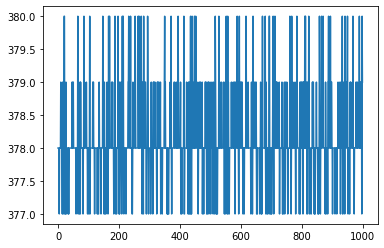

In [69]:
import matplotlib.pyplot as plt
# plt.plot([x[0] for x in observations]) # rads/sec^2
# plt.plot([x[1] for x in observations]) # rads/sec
plt.plot([x[2] for x in observations]) # potentiometer value
# plt.plot(c)

In [73]:
import numpy as np
print(np.std([x[0] for x in observations]))
print(np.std([x[1] for x in observations]))
print(np.std([x[2] for x in observations]))

0.03257292991949401
0.0026544350059753076
0.00034878572423169854


In [39]:
from utils import signal_to_force
la = 0.5
mu = 0.5
num_rolling = 5
force_speed_reaction = signal_to_force(2000+10) - signal_to_force(2000)

n = len(observations)
actions = np.random.binomial(1, p=0.5, size=n)
filtered_observations = []

x = np.array([0., 0., 0.])

F = np.array([
    [1, dt, 0],
    [0, 1, dt],
    [0, 0, 1]
])

z_rolling = [0.] * num_rolling

for i in range(n):
    u_ = actions[i] * force_speed_reaction
    u = np.array([0., 0., u_]) 
    z = observations[i]
    z_av = mu * z + (1 - mu) * np.mean(np.array(z_rolling), axis=0)
    x = la * (F @ x + u) + (1 - la) * z_av
    z_rolling.append(z.copy())
    del z_rolling[0]
    filtered_observations.append(x.copy())


C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
